In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_4_stride_4_2_noDO_decode_B1H_Inst_min_max_rolling_std_window_65_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           384       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           10272     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            2576      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              6

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

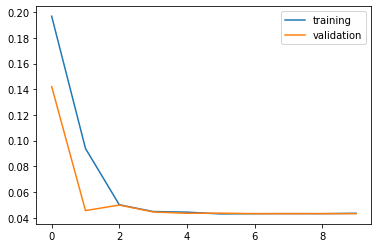

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)

bunch_sorted_index: [2 0 1]
group_bunches: [ 654. 2314.  627.]
group_bunches sorted: [ 627.  654. 2314.]
restore_index: [1 2 0]
group_bunches restored: [ 654. 2314.  627.]
bunch_sorted_index: [1 0 2]
group_bunches: [3007. 1117. 3142.]
group_bunches sorted: [1117. 3007. 3142.]
restore_index: [1 0 2]
group_bunches restored: [3007. 1117. 3142.]
bunch_sorted_index: [0 2 3 1]
group_bunches: [ 217. 3344. 2800. 3203.]
group_bunches sorted: [ 217. 2800. 3203. 3344.]
restore_index: [0 3 1 2]
group_bunches restored: [ 217. 3344. 2800. 3203.]
bunch_sorted_index: [0 2 1]
group_bunches: [1146. 2332. 1377.]
group_bunches sorted: [1146. 1377. 2332.]
restore_index: [0 2 1]
group_bunches restored: [1146. 2332. 1377.]

50/50 [==============================] - 116s 2s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
4845  Inst  6346     1     h  7 2017-10-29 13:18:13   
158   Inst  6436     1     h  7 2017-11-30 06:34:53   
1469  Inst  6786     1     h  7 2018-06-13 15:31:01   
945   Inst  7483     1     h  7 2018-11-29 14:25:14   
3037  Inst  6901     1     h  7 2018-07-08 04:11:36   

                                                   file  n_bunches  \
4845  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...       1868   
158   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...        408   
1469  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6786/...        924   
945   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7483/...        648   
3037  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6901/...        987   

      bunch_index  bunch_number  ts_length  chunk  
4845        732.0         399.0      65536     18  
158        1075.0         143.0      65536      0  
1469        480.0         341.0      65536      5  
945        2934.0         547.0      65536      3  
3037       1981.0         523.0      65536     11

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 1)

In [13]:
train_prediction.shape

(396800, 2048, 1)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 11s 2s/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  6693     1     h  7 2018-05-17 06:50:14   
1244  Inst  6278     1     h  7 2017-10-07 02:13:14   
5767  Inst  6765     1     h  7 2018-06-07 13:49:42   
7206  Inst  6193     1     h  7 2017-09-12 23:20:47   
7624  Inst  6693     1     h  7 2018-05-17 06:50:14   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6693/...       1887   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...       1868   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6765/...        780   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6193/...        684   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6693/...       1887   

      bunch_index  bunch_number  ts_length  chunk  
4808       1992.0        1104.0      65536     18  
1244       1145.0         617.0      65536      4  
5767        345.0         225.0      65536     22  
7206        113.0          55.0      65536     28  
7624       1992.0        1104.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 1)

In [18]:
validation_prediction.shape

(39680, 2048, 1)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

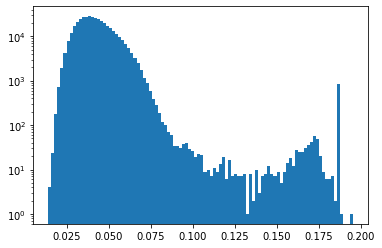

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

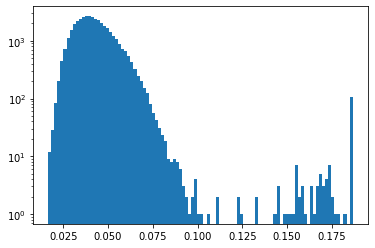

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.04689126891499374
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 13:18:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                    1868
bunch_index                                                   732
bunch_number                                                  399
ts_length                                                   65536
chunk                                                          18
Name: 4845, dtype: object


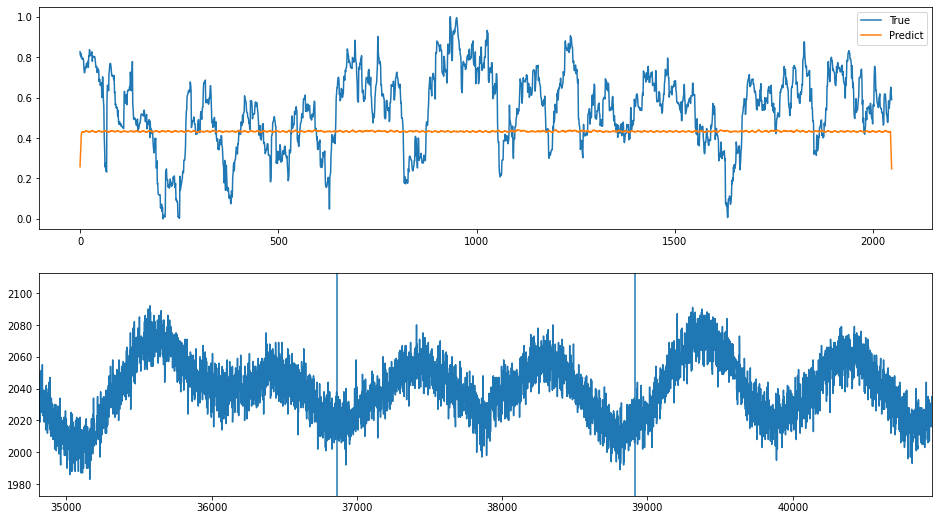

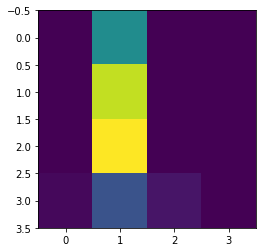

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 196686
Error: 0.014085175614405704
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 13:54:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                    1868
bunch_index                                                   132
bunch_number                                                   52
ts_length                                                   65536
chunk                                                          29
Name: 7675, dtype: object


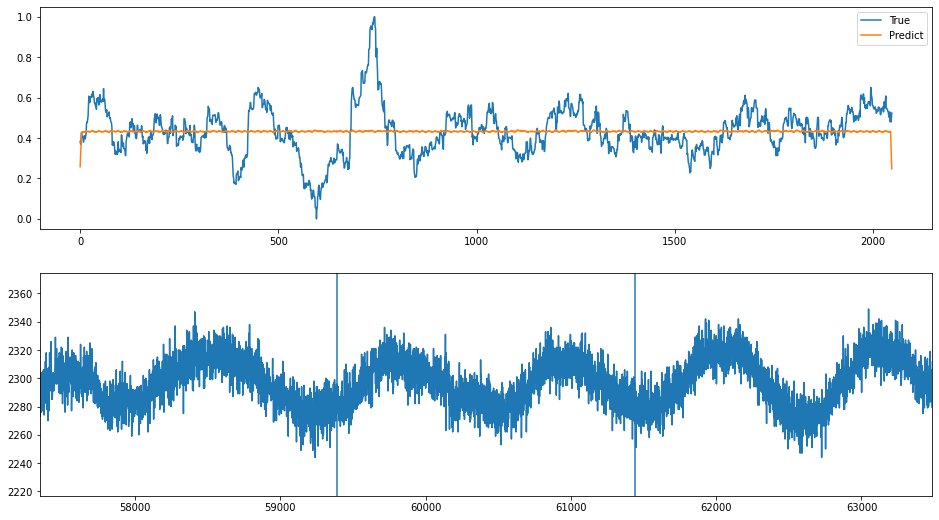

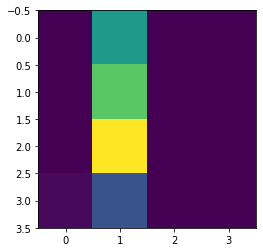

index: 319882
Error: 0.015379473122591688
type                                                         Inst
fill                                                         6356
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-02 07:19:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...
n_bunches                                                    1868
bunch_index                                                   928
bunch_number                                                  493
ts_length                                                   65536
chunk                                                          27
Name: 6925, dtype: object


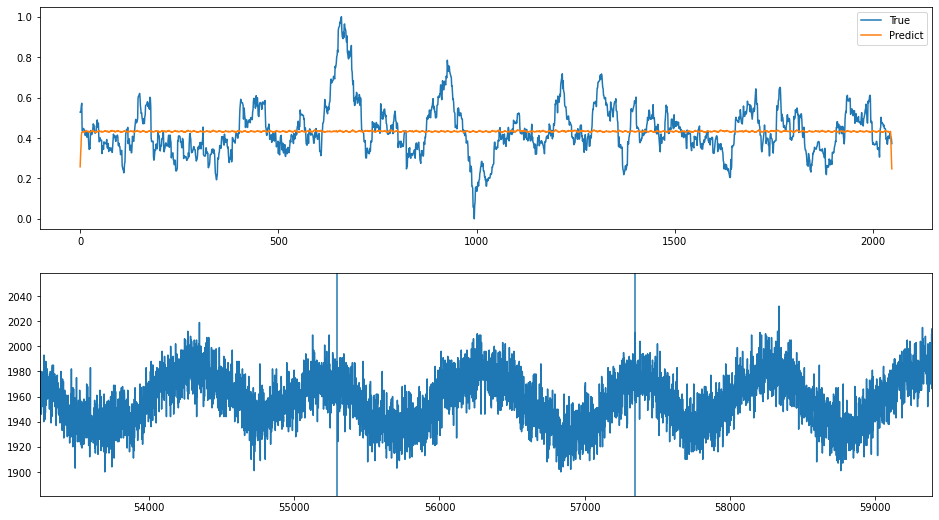

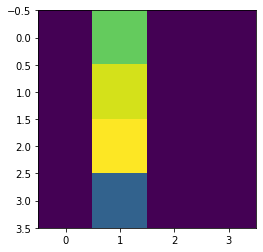

index: 226416
Error: 0.015453753189472529
type                                                         Inst
fill                                                         7308
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-16 11:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7308/...
n_bunches                                                     603
bunch_index                                                   421
bunch_number                                                  127
ts_length                                                   65536
chunk                                                          14
Name: 3837, dtype: object


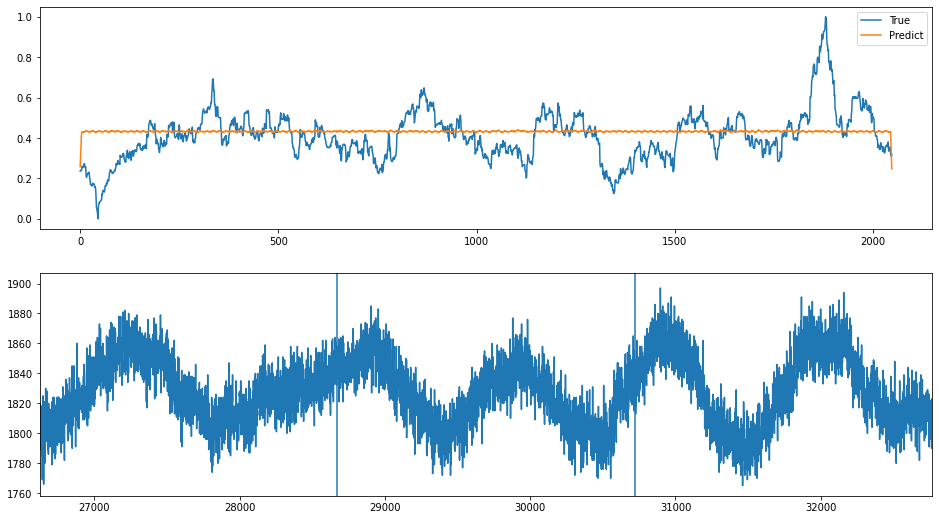

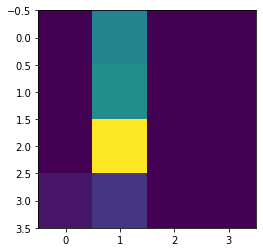

index: 335661
Error: 0.015765166566992336
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 19:27:24
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                    1836
bunch_index                                                  2643
bunch_number                                                 1405
ts_length                                                   65536
chunk                                                           4
Name: 1235, dtype: object


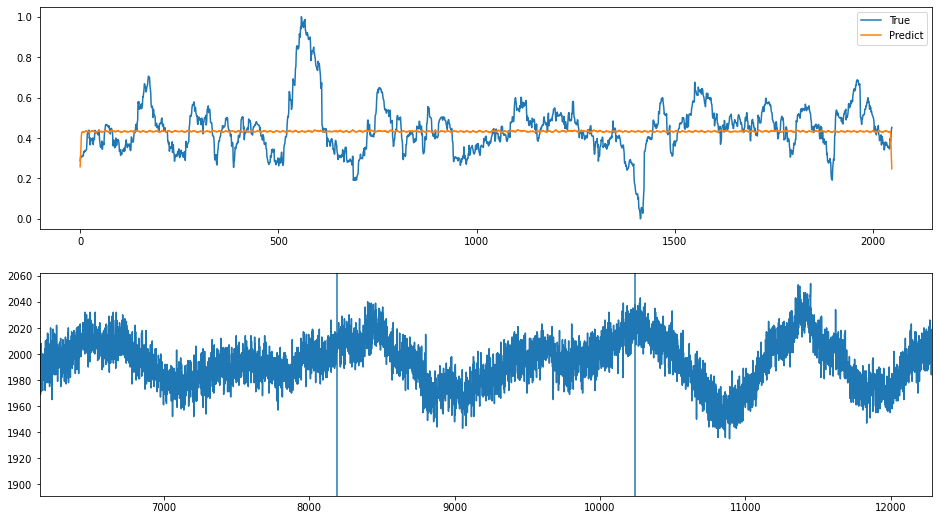

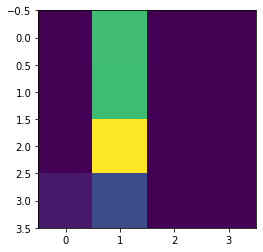

index: 38750
Error: 0.01594913638513896
type                                                         Inst
fill                                                         6737
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-28 21:31:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6737/...
n_bunches                                                     252
bunch_index                                                    87
bunch_number                                                   19
ts_length                                                   65536
chunk                                                           4
Name: 1074, dtype: object


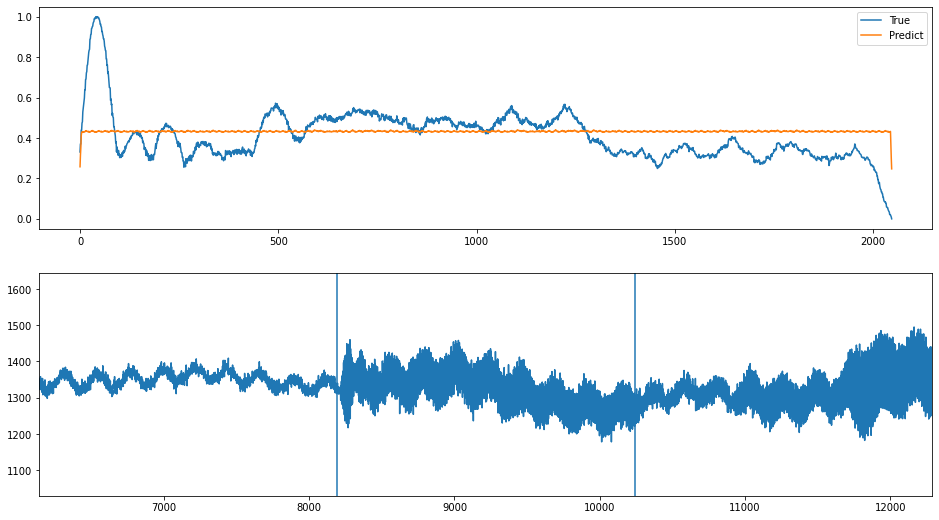

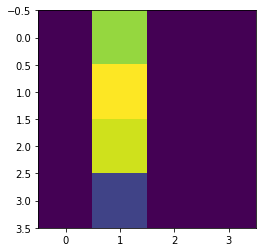

index: 296334
Error: 0.016274203212888676
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 19:22:25
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                    1836
bunch_index                                                  1363
bunch_number                                                  718
ts_length                                                   65536
chunk                                                          30
Name: 7861, dtype: object


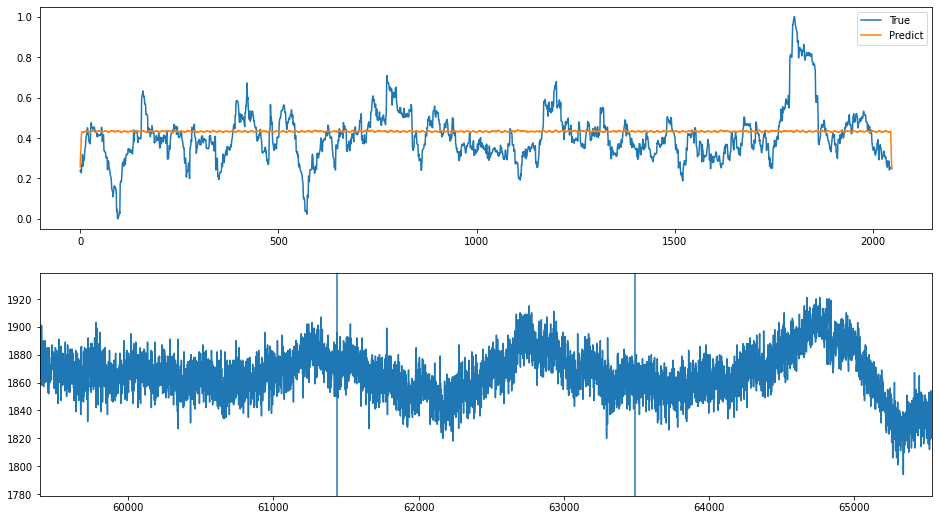

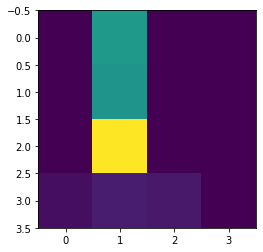

index: 344422
Error: 0.01644914856533357
type                                                         Inst
fill                                                         6706
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-20 10:58:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6706/...
n_bunches                                                     987
bunch_index                                                   580
bunch_number                                                  232
ts_length                                                   65536
chunk                                                          15
Name: 3978, dtype: object


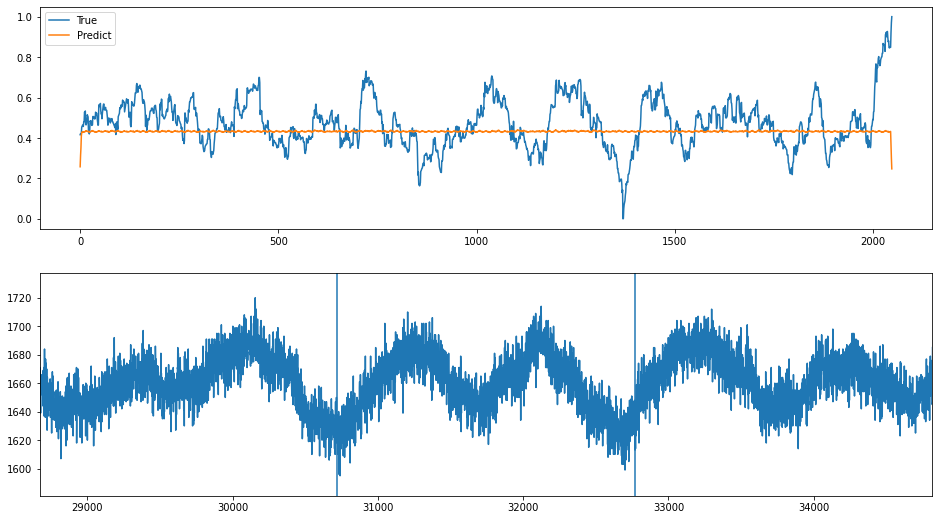

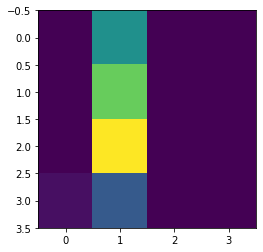

index: 38516
Error: 0.016495033461676575
type                                                         Inst
fill                                                         6279
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 09:19:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6279/...
n_bunches                                                    1868
bunch_index                                                  1966
bunch_number                                                 1051
ts_length                                                   65536
chunk                                                           5
Name: 1339, dtype: object


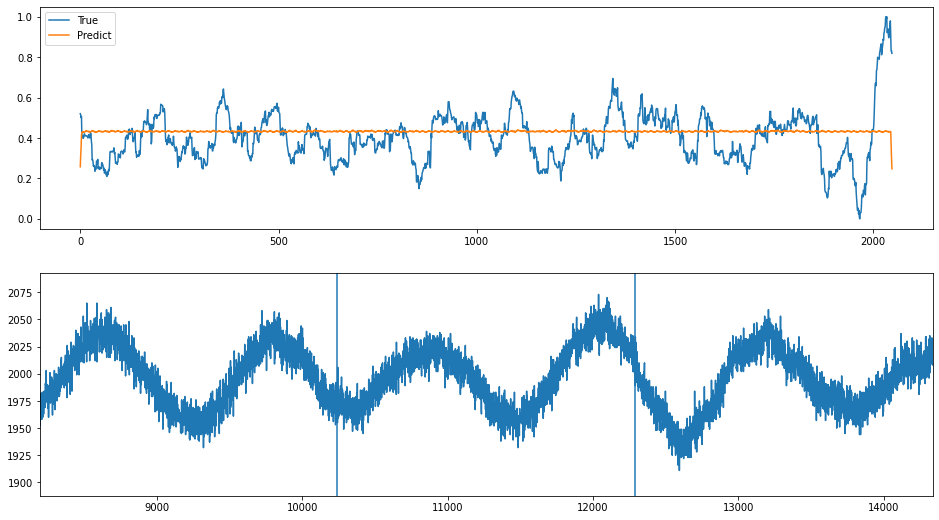

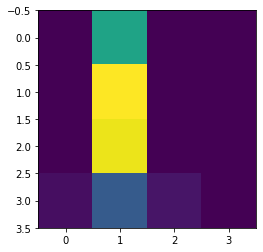

index: 26237
Error: 0.01677705068879145
type                                                         Inst
fill                                                         6650
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-07 12:36:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6650/...
n_bunches                                                    2556
bunch_index                                                  1327
bunch_number                                                  954
ts_length                                                   65536
chunk                                                          17
Name: 4423, dtype: object


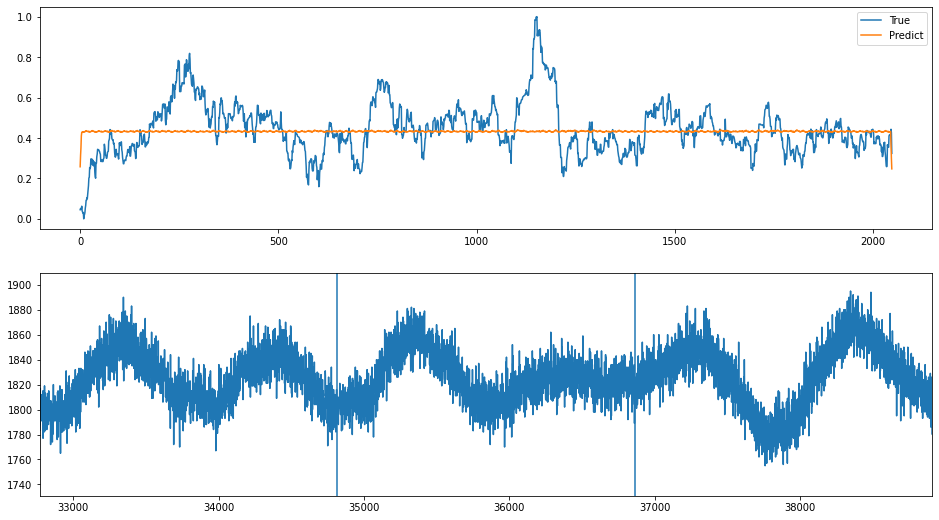

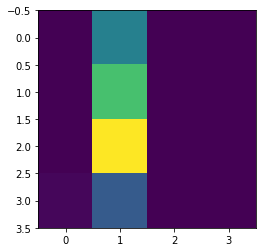

index: 46300
Error: 0.016779474155699456
type                                                         Inst
fill                                                         6628
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-01 00:59:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6628/...
n_bunches                                                    1551
bunch_index                                                   451
bunch_number                                                  261
ts_length                                                   65536
chunk                                                          14
Name: 3667, dtype: object


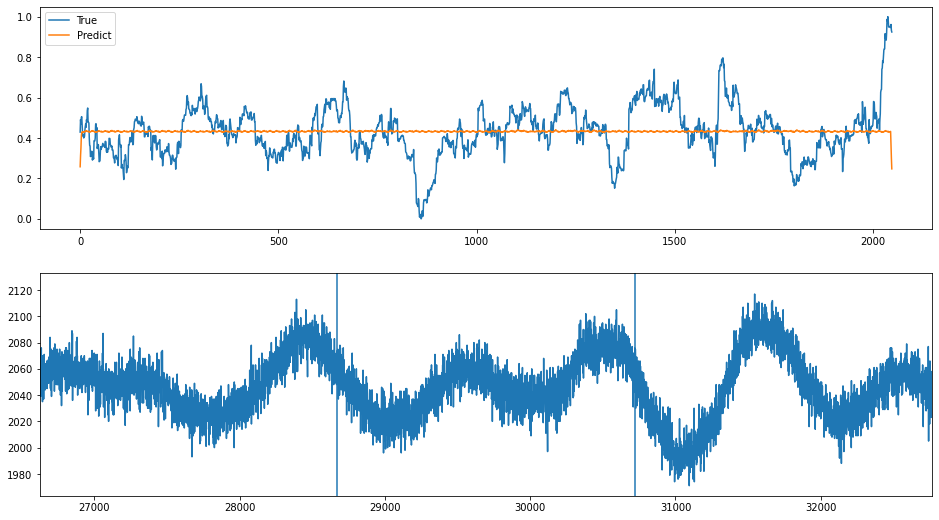

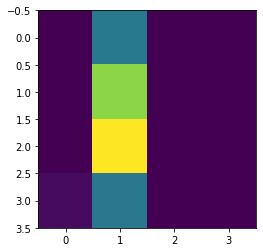

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 116607
Error: 0.195013810903174
type                                                         Inst
fill                                                         6436
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-30 07:12:28
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...
n_bunches                                                     408
bunch_index                                                   302
bunch_number                                                   14
ts_length                                                   65536
chunk                                                           8
Name: 2193, dtype: object


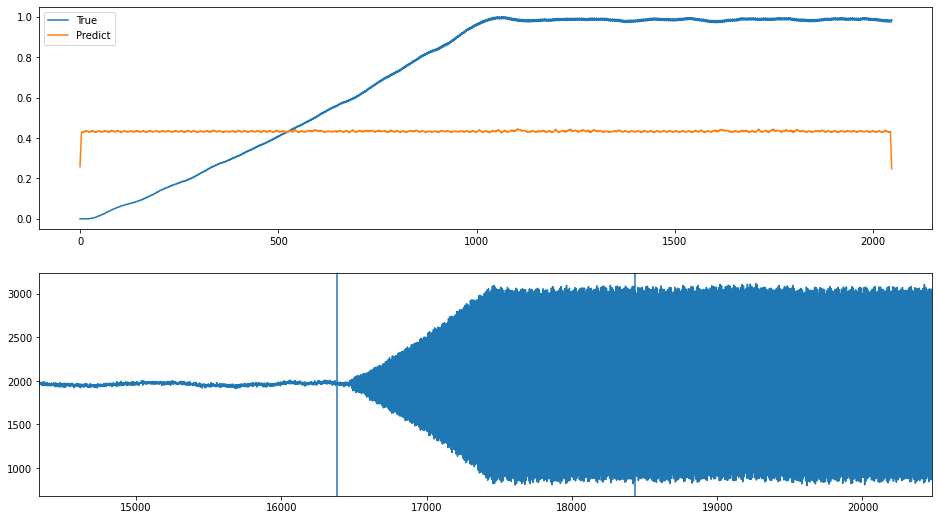

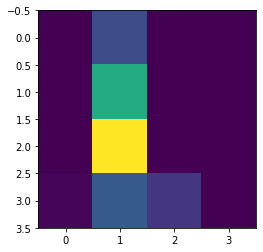

index: 21256
Error: 0.18796007564368464
type                                                         Inst
fill                                                         6382
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-12 15:40:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6382/...
n_bunches                                                     652
bunch_index                                                  1482
bunch_number                                                  560
ts_length                                                   65536
chunk                                                           4
Name: 1185, dtype: object


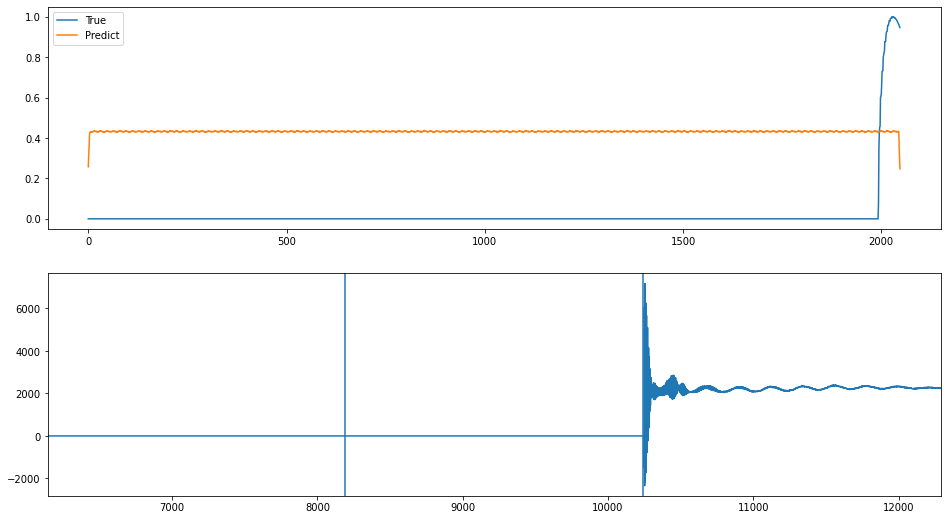

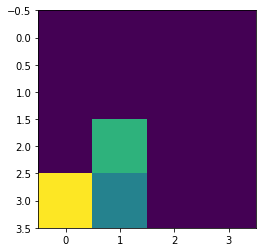

index: 326672
Error: 0.1867813097409104
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-06 02:11:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                     172
bunch_index                                                   172
bunch_number                                                   77
ts_length                                                   65536
chunk                                                           2
Name: 545, dtype: object


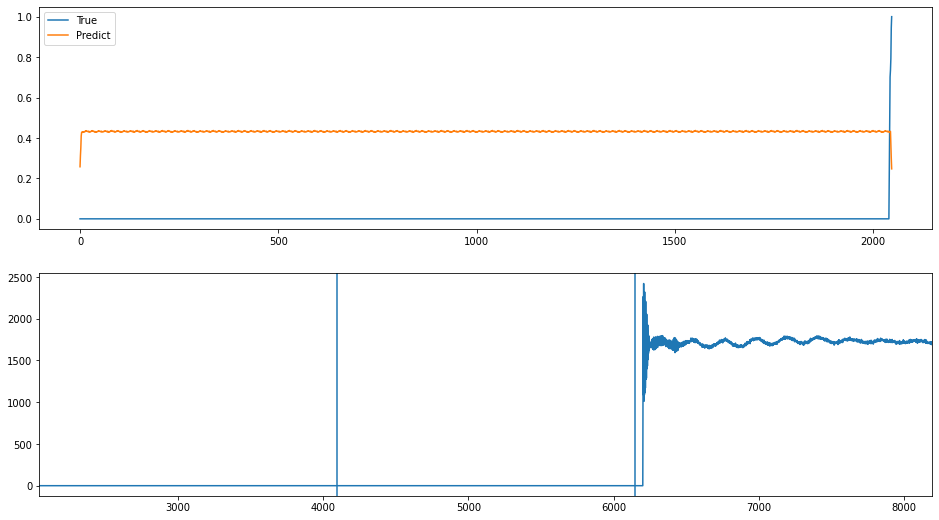

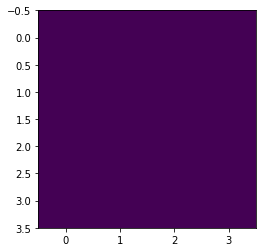

index: 11985
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                     3
bunch_number                                                    3
ts_length                                                   65536
chunk                                                           8
Name: 2064, dtype: object


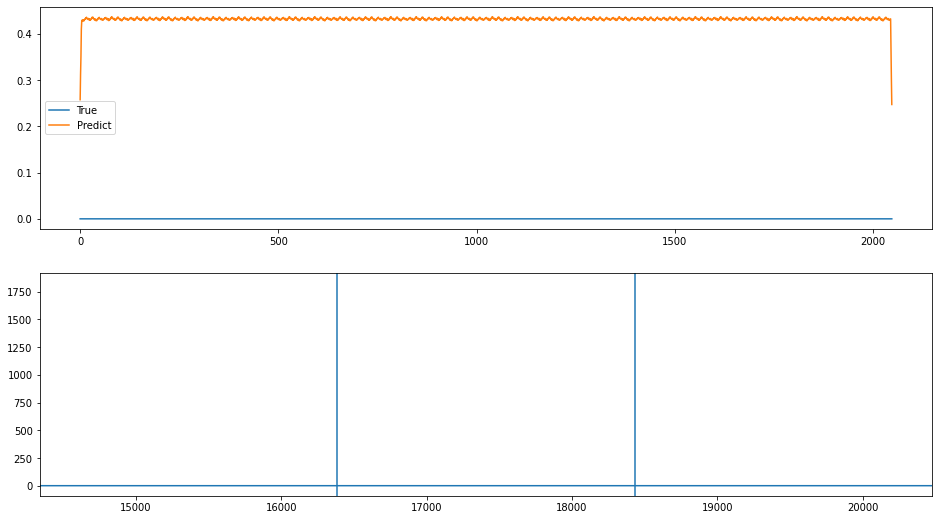

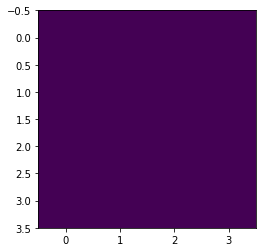

index: 219907
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7315
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-18 16:43:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7315/...
n_bunches                                                     924
bunch_index                                                  1233
bunch_number                                                  910
ts_length                                                   65536
chunk                                                           9
Name: 2350, dtype: object


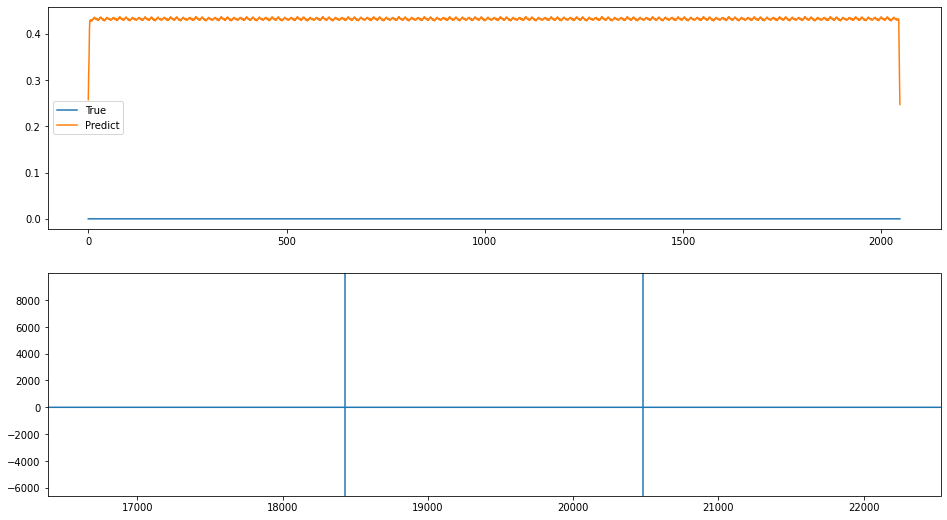

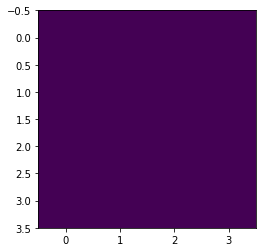

index: 39944
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6360
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-03 13:13:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6360/...
n_bunches                                                     652
bunch_index                                                  1146
bunch_number                                                  618
ts_length                                                   65536
chunk                                                           8
Name: 2140, dtype: object


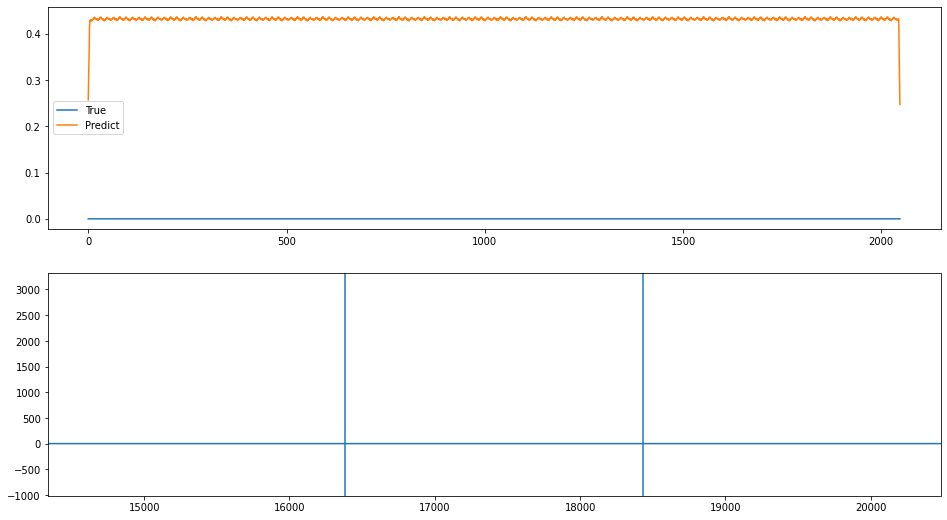

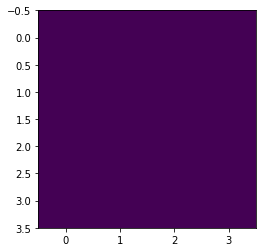

index: 126165
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7477
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-26 21:55:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7477/...
n_bunches                                                     124
bunch_index                                                   425
bunch_number                                                   85
ts_length                                                   65536
chunk                                                           6
Name: 1791, dtype: object


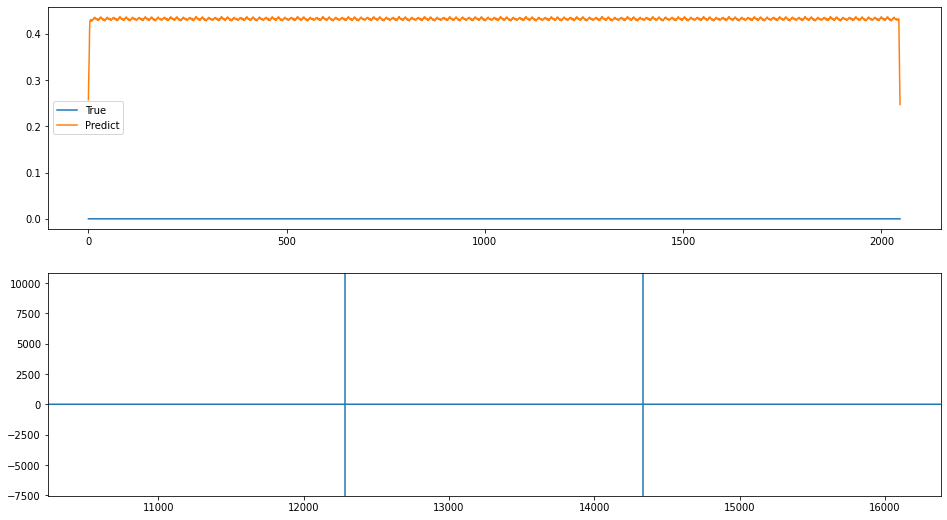

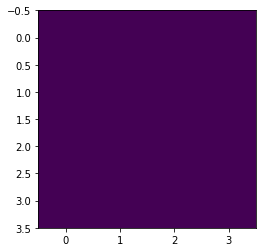

index: 120996
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7477
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-26 21:55:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7477/...
n_bunches                                                     124
bunch_index                                                   425
bunch_number                                                   85
ts_length                                                   65536
chunk                                                           7
Name: 2047, dtype: object


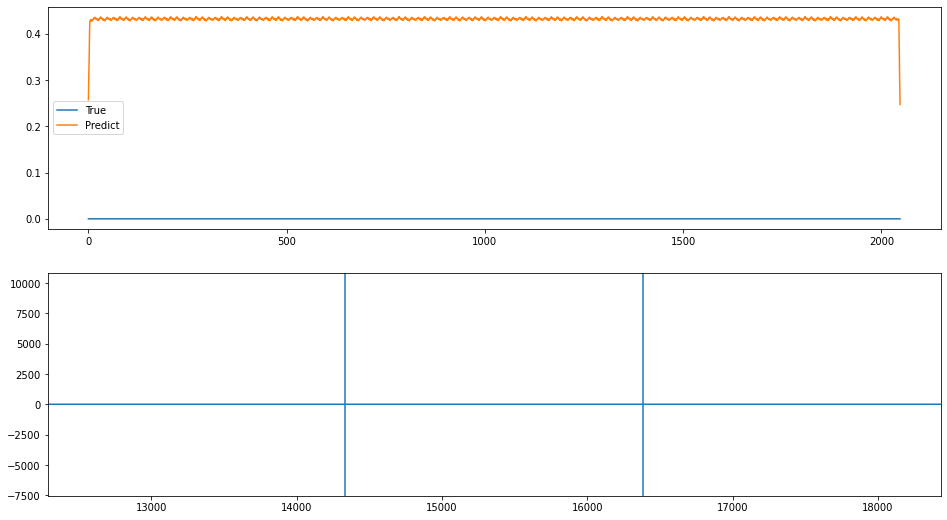

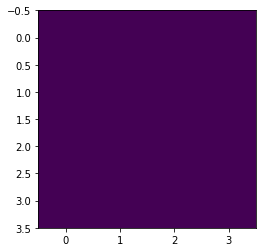

index: 309332
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  1198
bunch_number                                                  240
ts_length                                                   65536
chunk                                                          12
Name: 3293, dtype: object


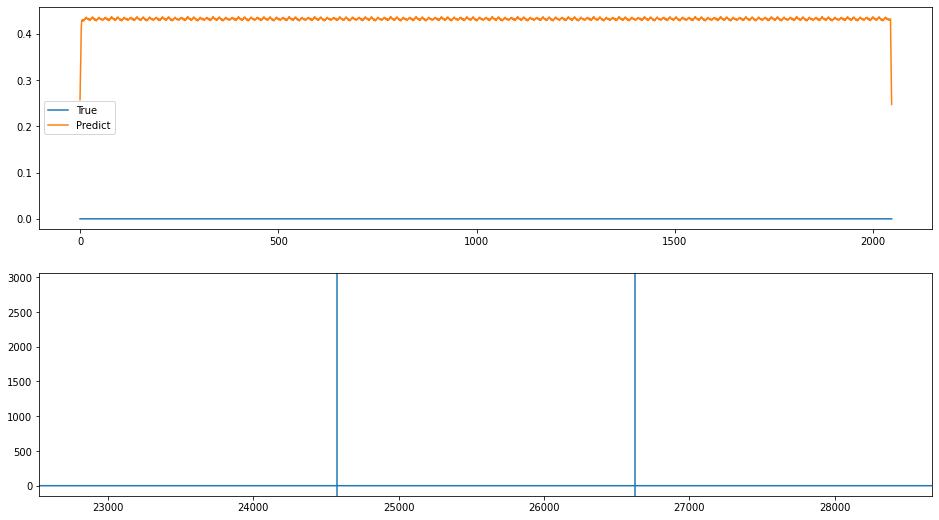

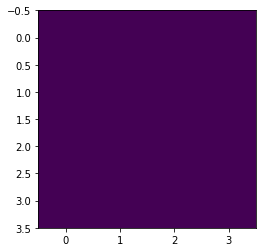

index: 131020
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6283
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:18:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6283/...
n_bunches                                                     780
bunch_index                                                  1312
bunch_number                                                  707
ts_length                                                   65536
chunk                                                           3
Name: 819, dtype: object


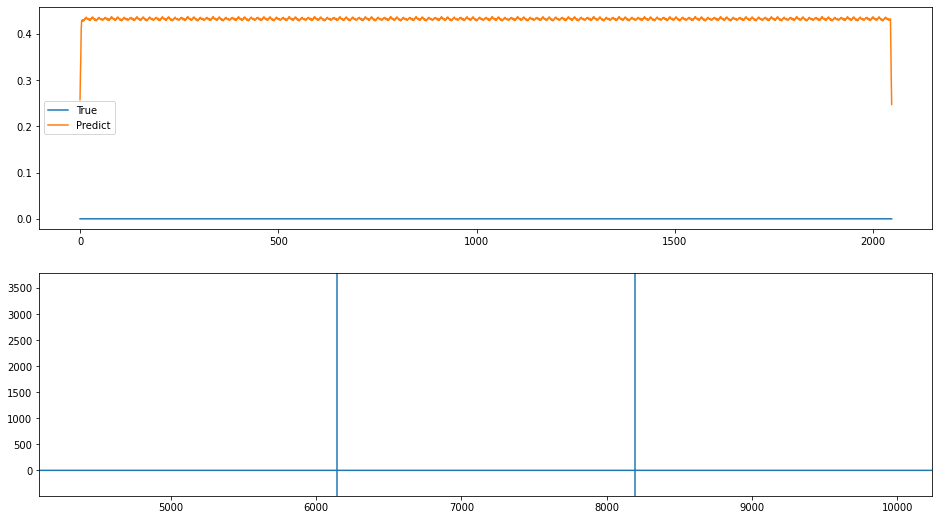

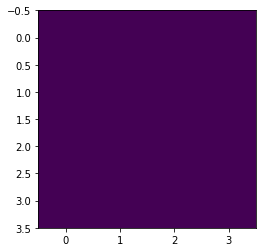

index: 203827
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6684
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 06:23:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6684/...
n_bunches                                                    1068
bunch_index                                                  1304
bunch_number                                                  931
ts_length                                                   65536
chunk                                                           5
Name: 1404, dtype: object


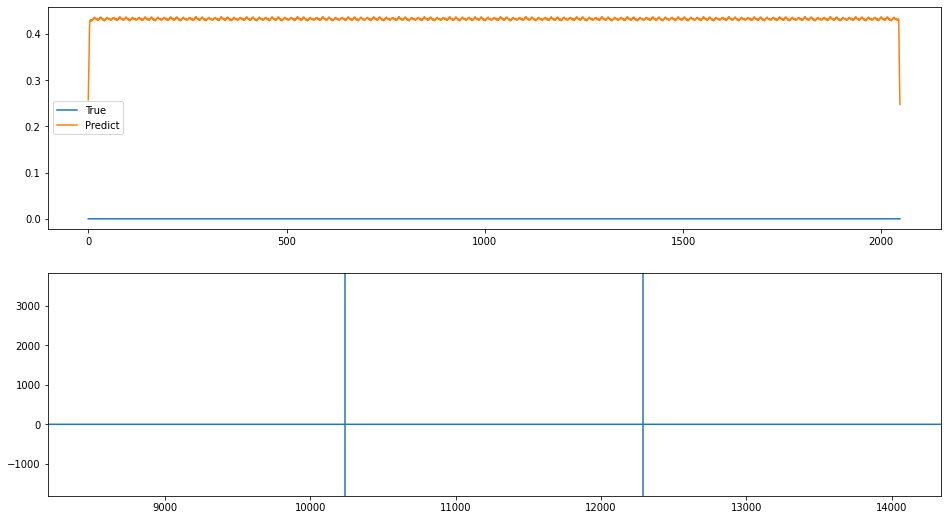

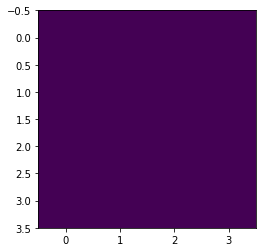

index: 215436
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7264
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-07 00:49:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7264/...
n_bunches                                                     540
bunch_index                                                   689
bunch_number                                                  498
ts_length                                                   65536
chunk                                                          12
Name: 3092, dtype: object


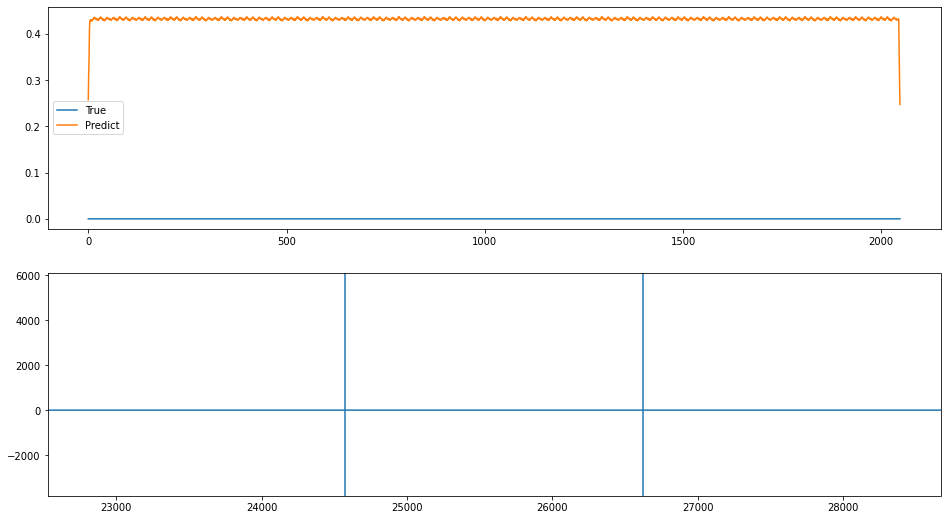

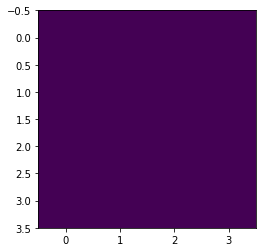

index: 193031
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6394
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 17:29:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6394/...
n_bunches                                                     140
bunch_index                                                   178
bunch_number                                                   58
ts_length                                                   65536
chunk                                                           0
Name: 190, dtype: object


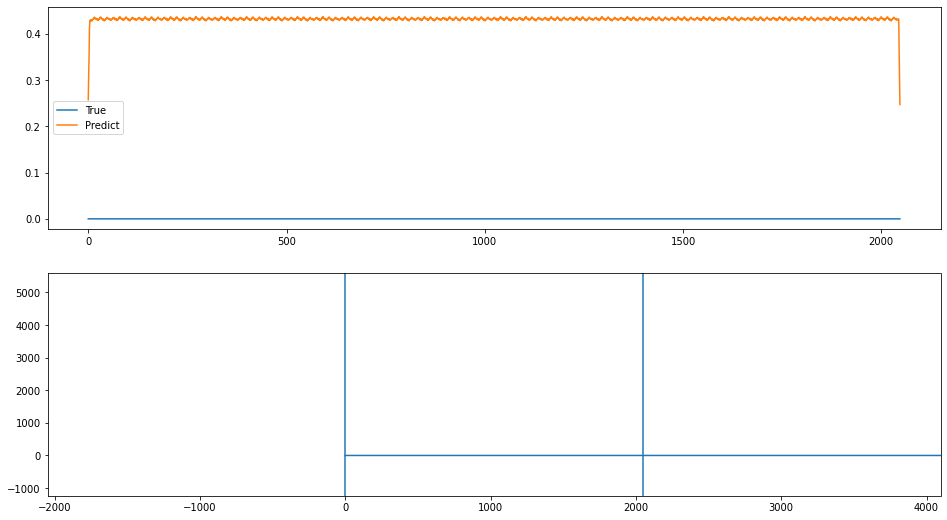

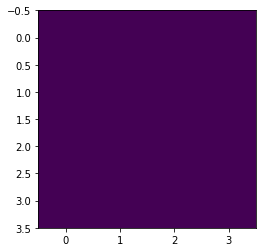

index: 126691
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7477
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-26 21:55:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7477/...
n_bunches                                                     124
bunch_index                                                   425
bunch_number                                                   85
ts_length                                                   65536
chunk                                                           0
Name: 255, dtype: object


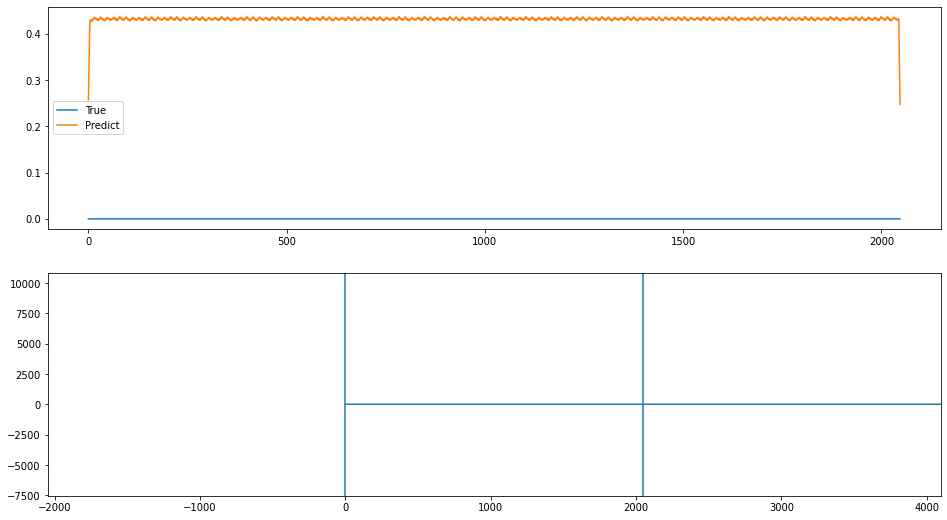

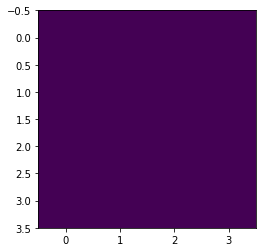

index: 123121
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6451
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-12-03 00:07:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6451/...
n_bunches                                                     129
bunch_index                                                   544
bunch_number                                                   47
ts_length                                                   65536
chunk                                                           3
Name: 885, dtype: object


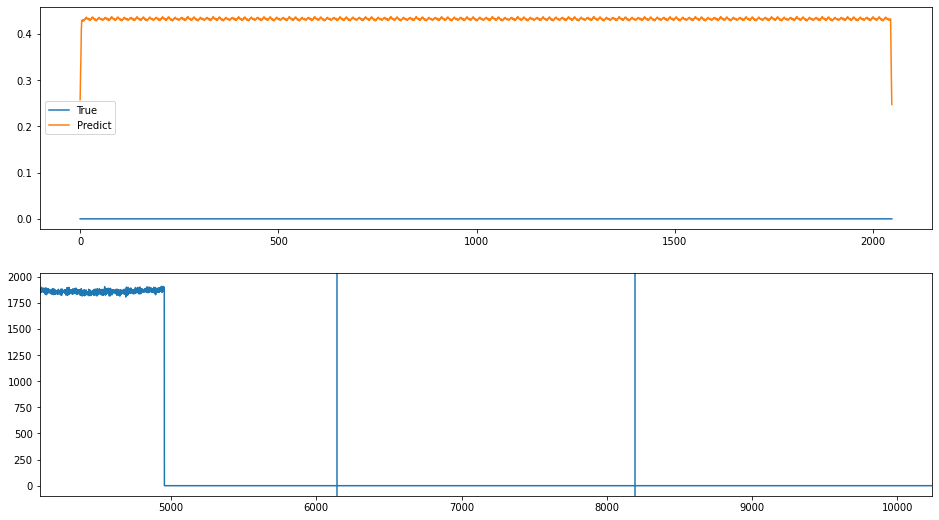

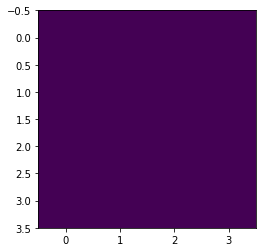

index: 89785
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6768
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-08 07:54:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6768/...
n_bunches                                                     252
bunch_index                                                   354
bunch_number                                                  234
ts_length                                                   65536
chunk                                                          21
Name: 5605, dtype: object


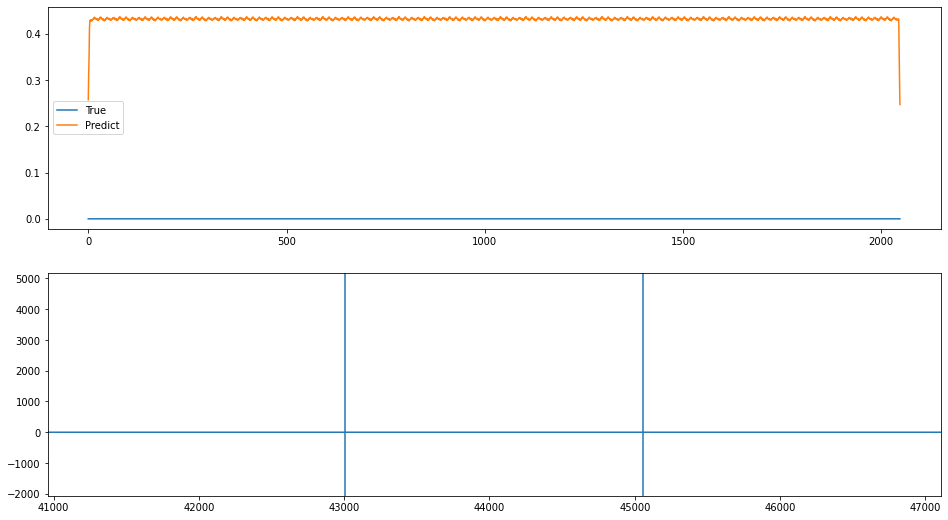

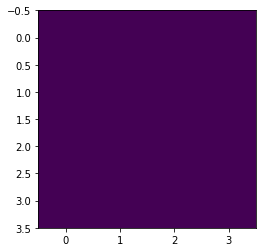

index: 200406
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6684
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 06:23:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6684/...
n_bunches                                                    1068
bunch_index                                                  1304
bunch_number                                                  931
ts_length                                                   65536
chunk                                                          21
Name: 5500, dtype: object


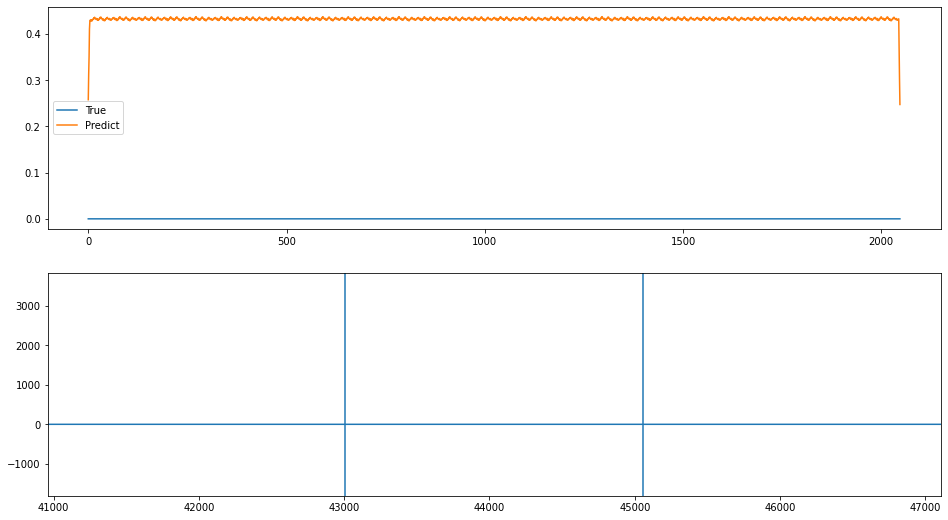

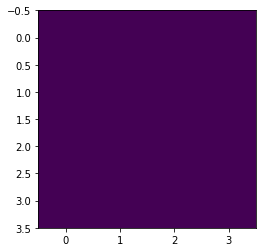

index: 29163
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6363
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-05 20:49:45
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6363/...
n_bunches                                                     428
bunch_index                                                   707
bunch_number                                                  385
ts_length                                                   65536
chunk                                                           5
Name: 1461, dtype: object


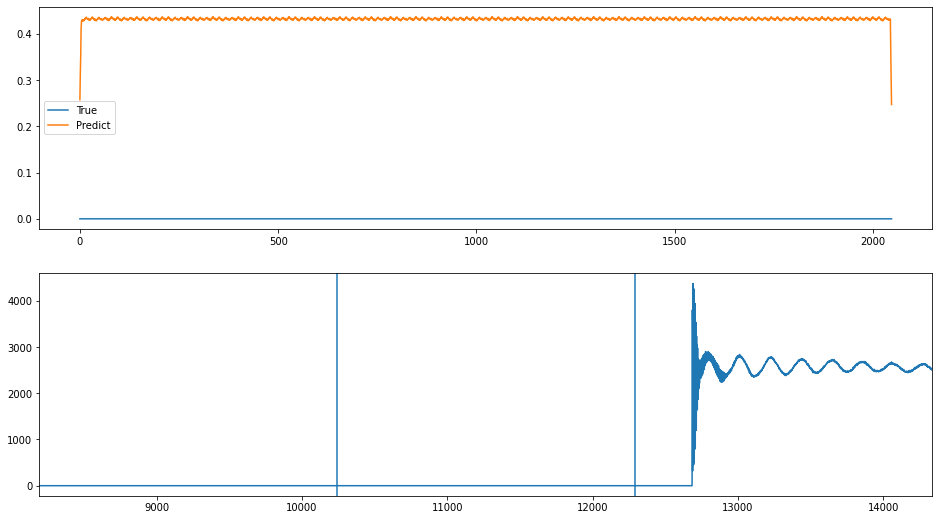

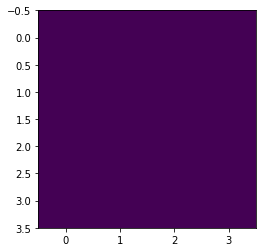

index: 95018
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6768
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-08 07:54:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6768/...
n_bunches                                                     252
bunch_index                                                   354
bunch_number                                                  234
ts_length                                                   65536
chunk                                                           2
Name: 741, dtype: object


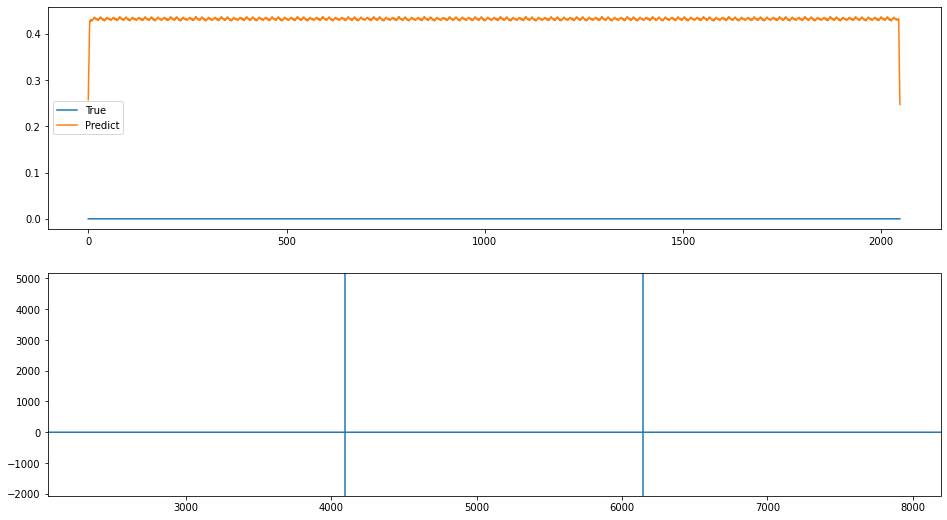

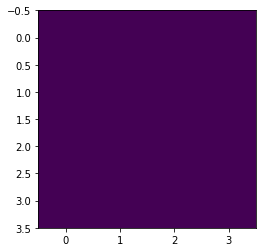

index: 263348
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7347
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 10:18:28
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7347/...
n_bunches                                                     540
bunch_index                                                   701
bunch_number                                                  510
ts_length                                                   65536
chunk                                                           0
Name: 82, dtype: object


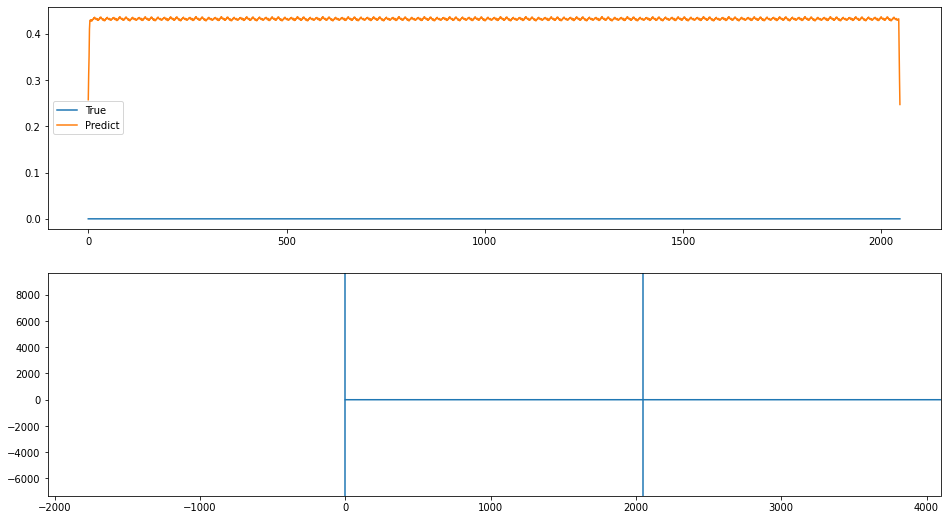

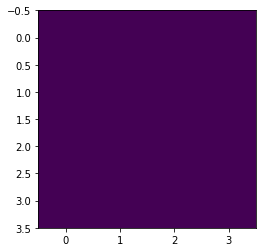

index: 71462
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6284
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 16:39:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6284/...
n_bunches                                                     652
bunch_index                                                  1122
bunch_number                                                  602
ts_length                                                   65536
chunk                                                           4
Name: 1248, dtype: object


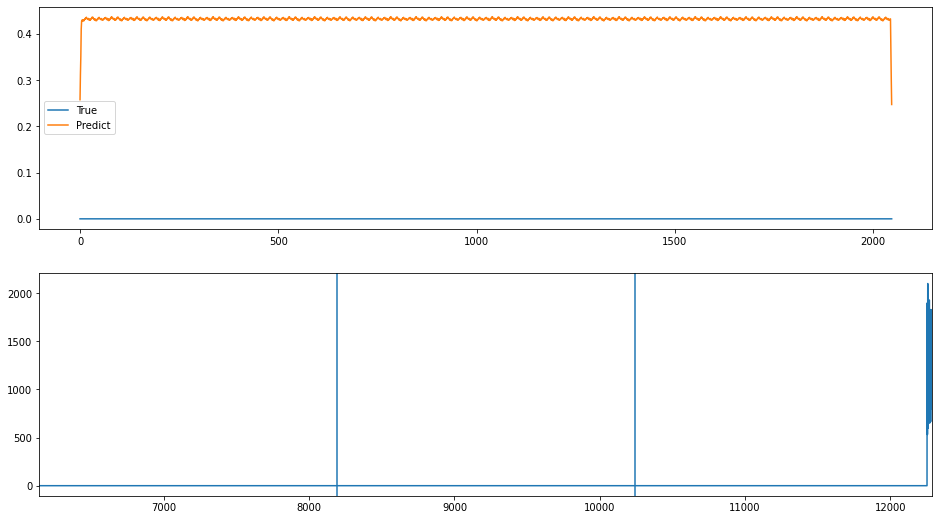

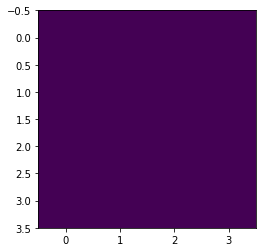

index: 235671
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6360
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-03 13:13:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6360/...
n_bunches                                                     652
bunch_index                                                  1147
bunch_number                                                  619
ts_length                                                   65536
chunk                                                          15
Name: 3863, dtype: object


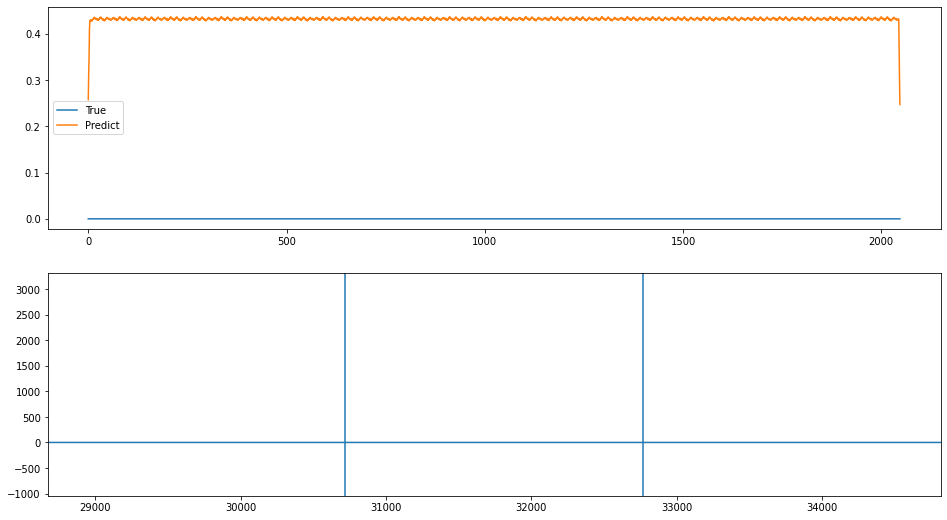

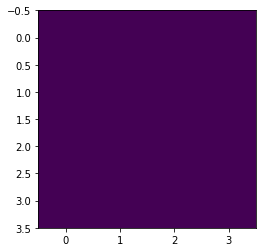

index: 67447
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7252
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-03 02:02:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7252/...
n_bunches                                                     108
bunch_index                                                    76
bunch_number                                                   27
ts_length                                                   65536
chunk                                                          10
Name: 2722, dtype: object


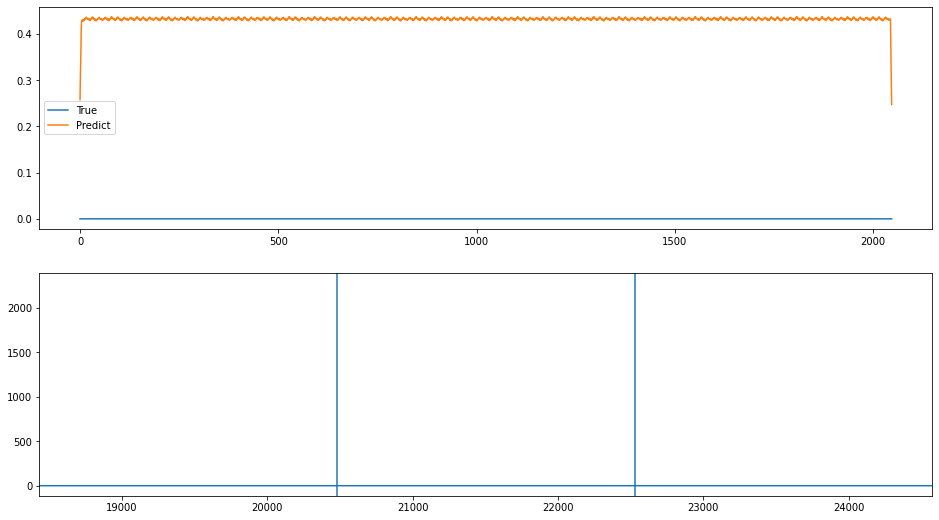

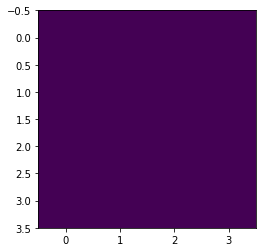

index: 201898
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6684
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 06:23:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6684/...
n_bunches                                                    1068
bunch_index                                                  1304
bunch_number                                                  931
ts_length                                                   65536
chunk                                                          22
Name: 5756, dtype: object


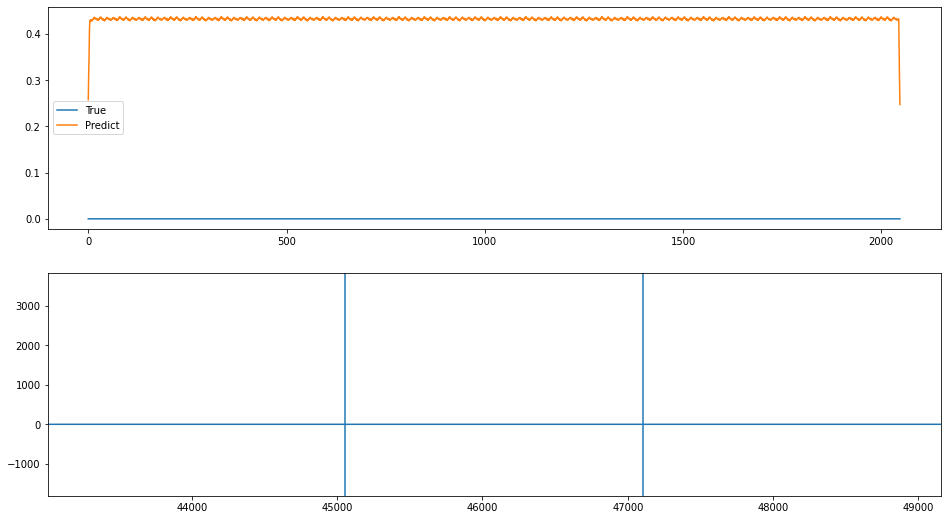

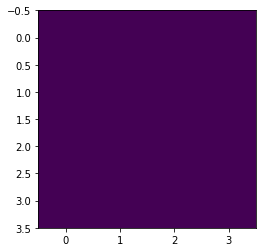

index: 201897
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-06 02:15:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                     428
bunch_index                                                   682
bunch_number                                                  368
ts_length                                                   65536
chunk                                                           6
Name: 1772, dtype: object


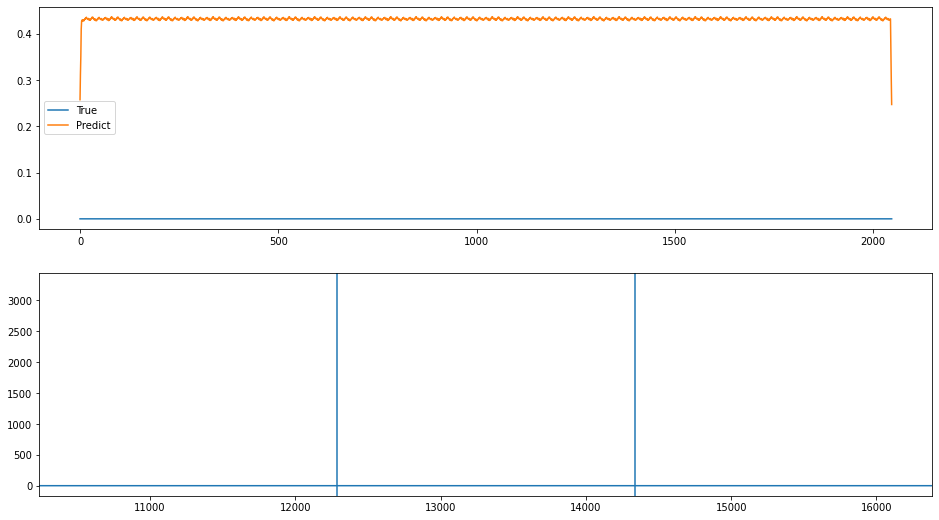

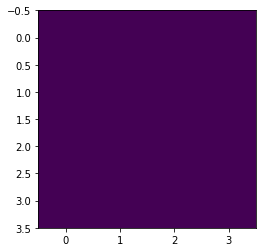

index: 47657
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6671
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-11 16:02:43
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6671/...
n_bunches                                                     156
bunch_index                                                   249
bunch_number                                                   47
ts_length                                                   65536
chunk                                                          21
Name: 5484, dtype: object


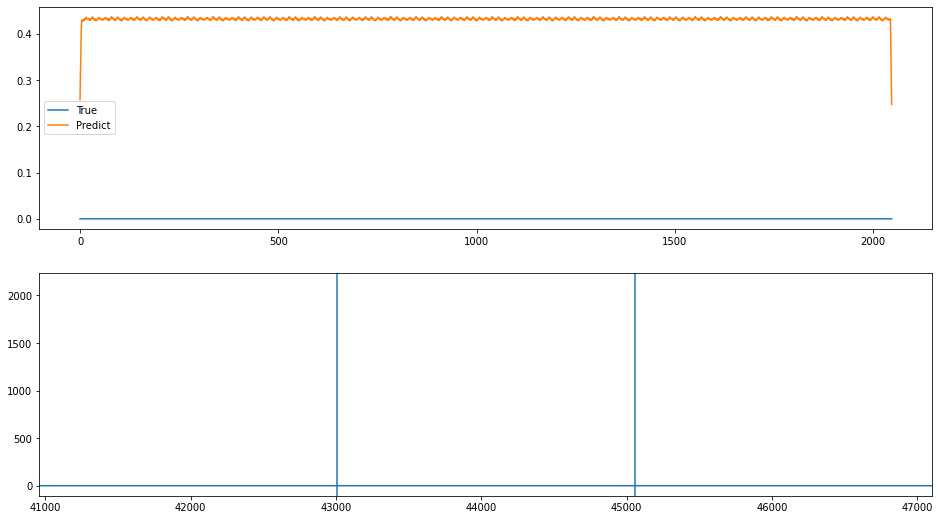

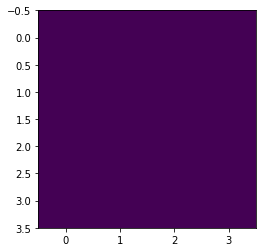

index: 248076
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7077
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-23 13:35:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7077/...
n_bunches                                                     300
bunch_index                                                  1044
bunch_number                                                  237
ts_length                                                   65536
chunk                                                          22
Name: 5764, dtype: object


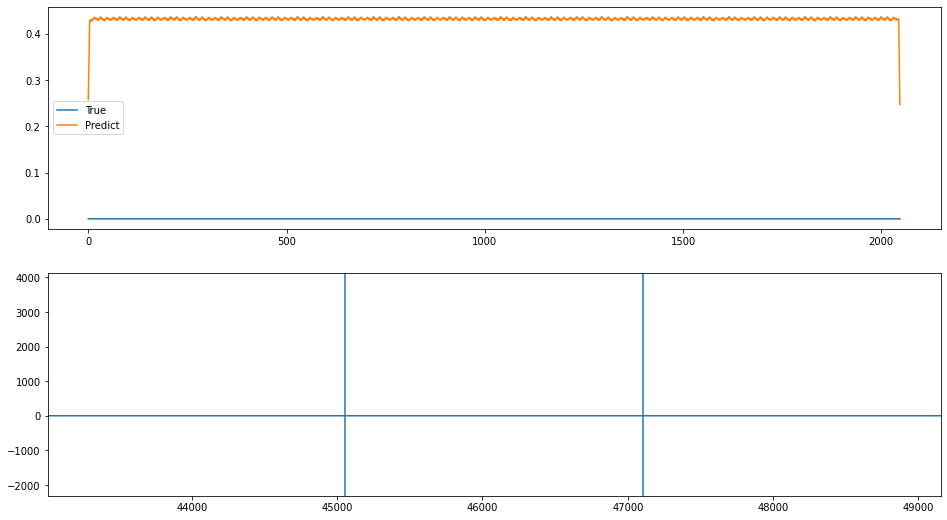

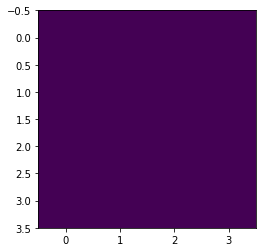

index: 56397
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7392
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-30 19:14:34
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7392/...
n_bunches                                                     300
bunch_index                                                  2185
bunch_number                                                  214
ts_length                                                   65536
chunk                                                           4
Name: 1215, dtype: object


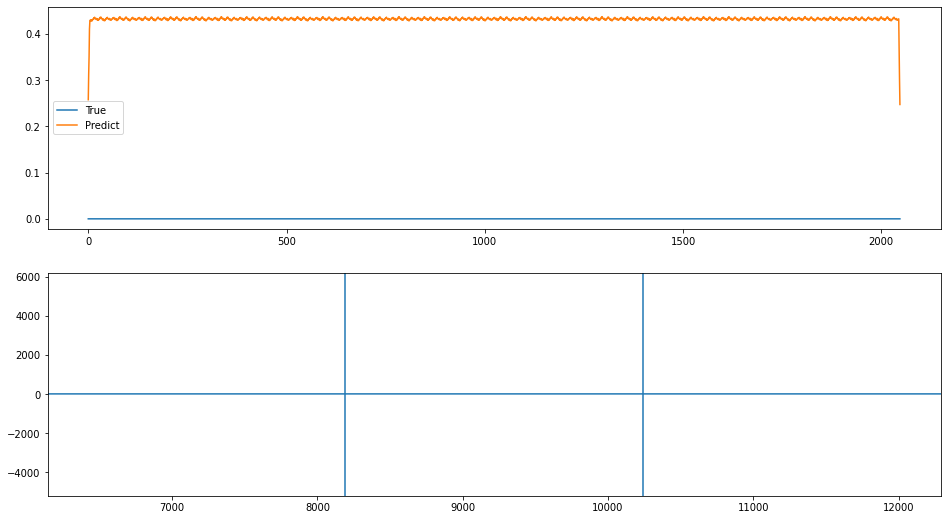

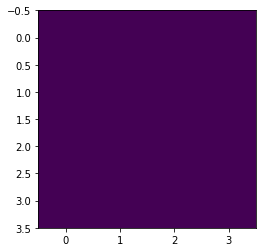

index: 39909
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6360
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-03 13:13:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6360/...
n_bunches                                                     652
bunch_index                                                  1146
bunch_number                                                  618
ts_length                                                   65536
chunk                                                           2
Name: 604, dtype: object


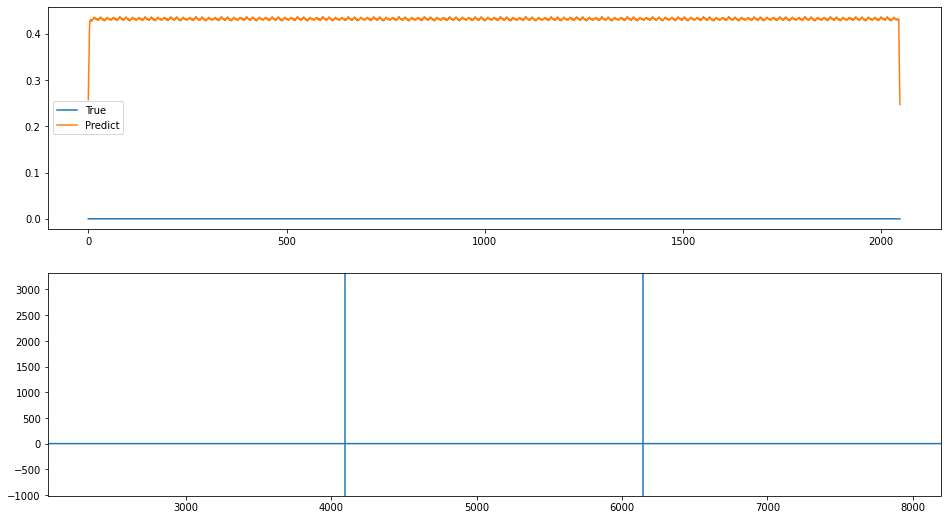

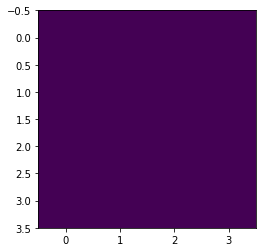

index: 302808
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7480
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-27 22:40:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7480/...
n_bunches                                                     166
bunch_index                                                   721
bunch_number                                                  153
ts_length                                                   65536
chunk                                                          10
Name: 2571, dtype: object


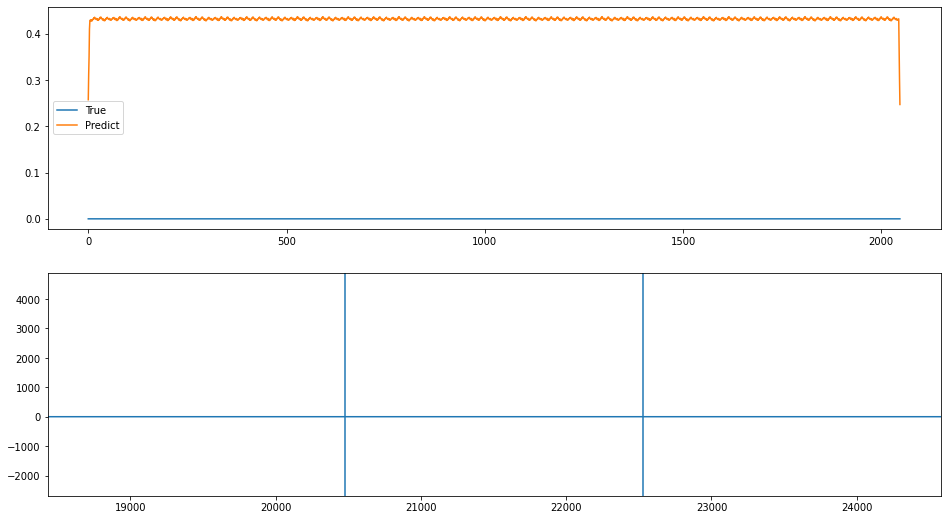

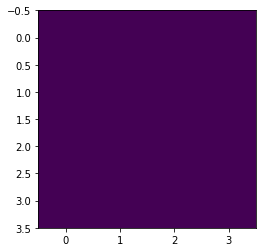

index: 14442
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6282
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-08 02:00:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6282/...
n_bunches                                                     172
bunch_index                                                     3
bunch_number                                                    3
ts_length                                                   65536
chunk                                                          18
Name: 4624, dtype: object


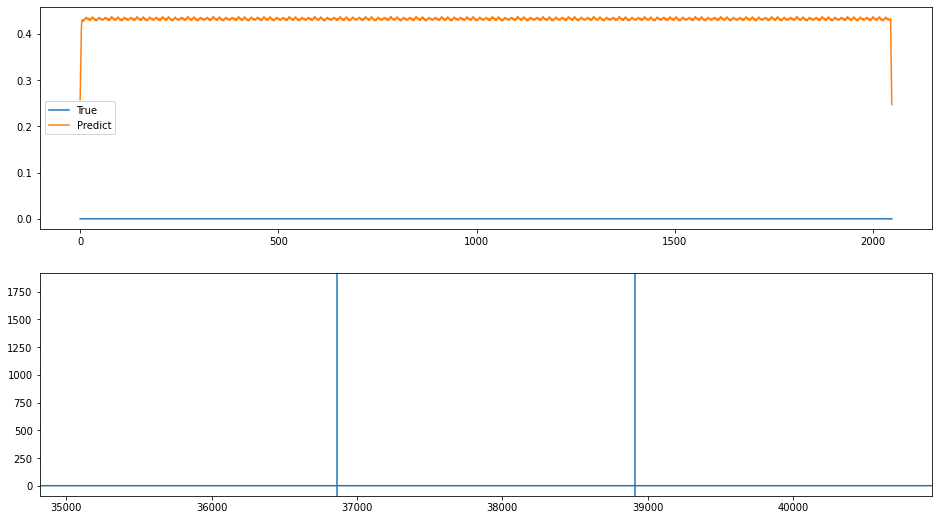

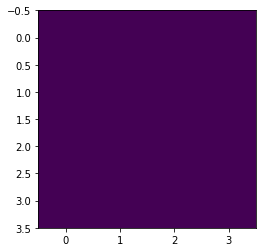

index: 84330
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6390
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-15 15:33:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6390/...
n_bunches                                                     396
bunch_index                                                   653
bunch_number                                                  325
ts_length                                                   65536
chunk                                                           3
Name: 808, dtype: object


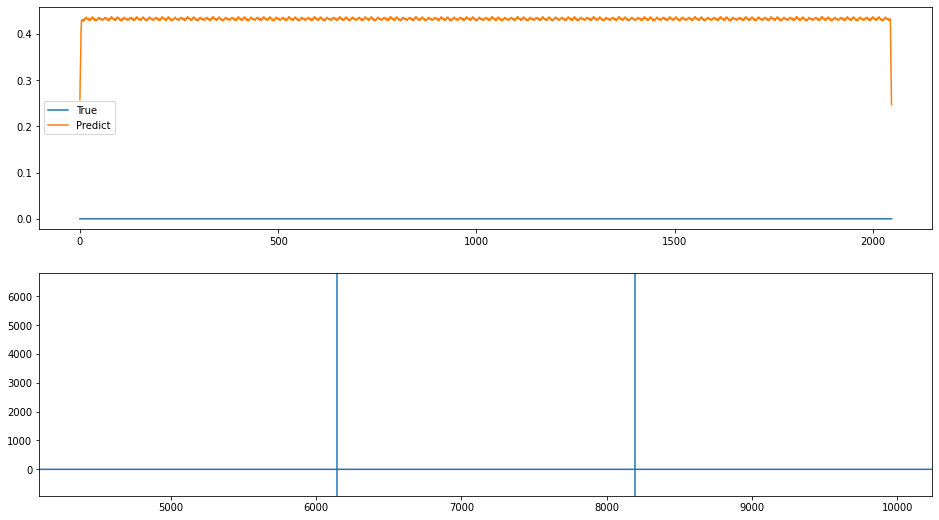

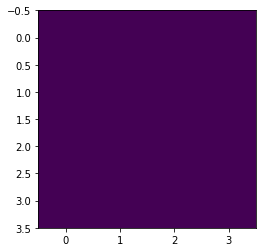

index: 386573
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7058
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-17 05:32:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7058/...
n_bunches                                                     420
bunch_index                                                  1726
bunch_number                                                  325
ts_length                                                   65536
chunk                                                          11
Name: 3040, dtype: object


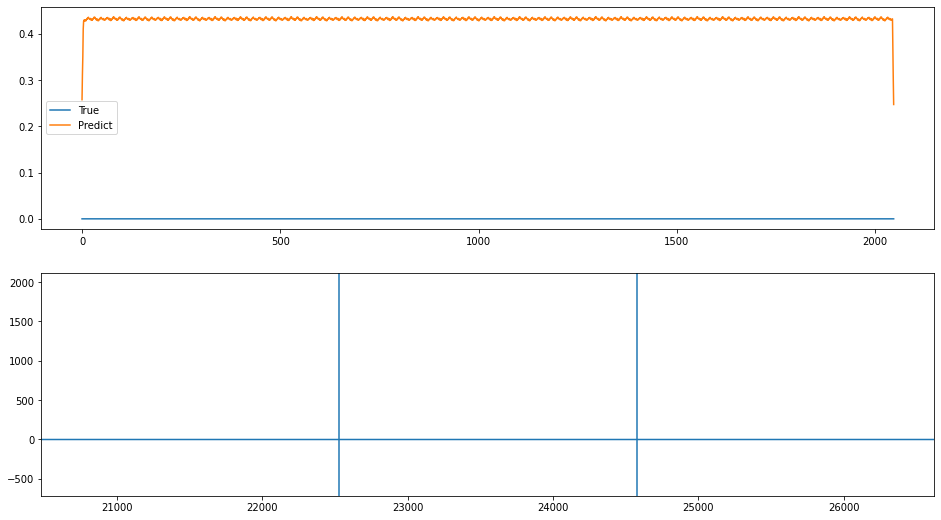

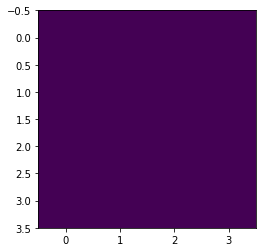

index: 142236
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6358
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-02 16:05:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6358/...
n_bunches                                                     652
bunch_index                                                  1157
bunch_number                                                  622
ts_length                                                   65536
chunk                                                           2
Name: 666, dtype: object


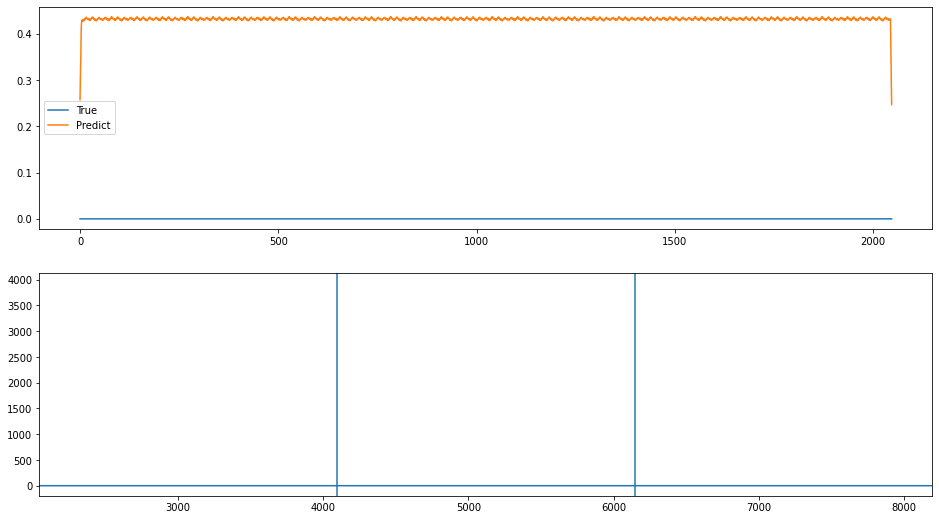

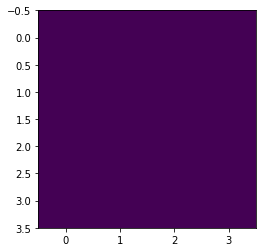

index: 221721
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7264
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-07 00:49:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7264/...
n_bunches                                                     540
bunch_index                                                   689
bunch_number                                                  498
ts_length                                                   65536
chunk                                                           1
Name: 276, dtype: object


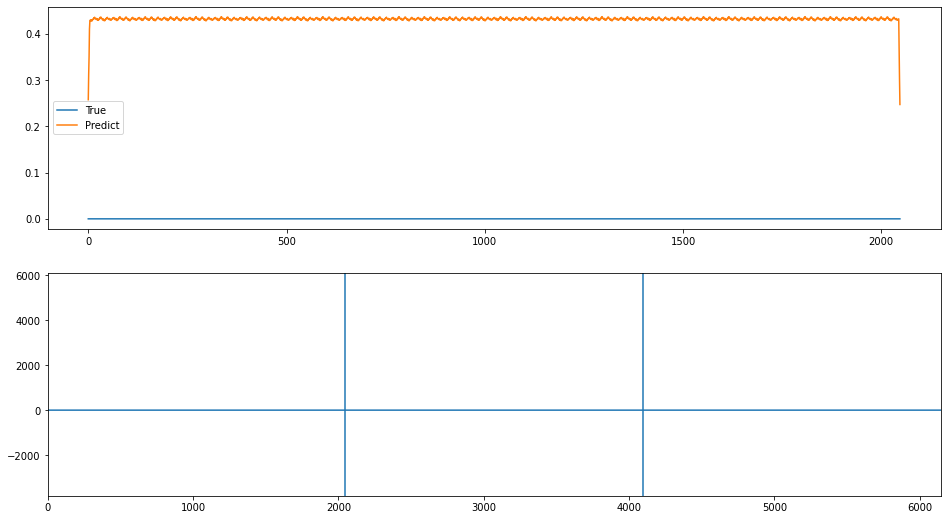

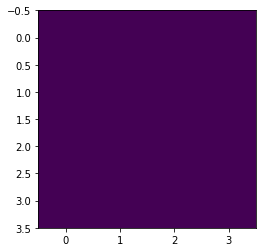

index: 322928
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7380
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 01:10:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7380/...
n_bunches                                                     156
bunch_index                                                   957
bunch_number                                                   62
ts_length                                                   65536
chunk                                                           6
Name: 1733, dtype: object


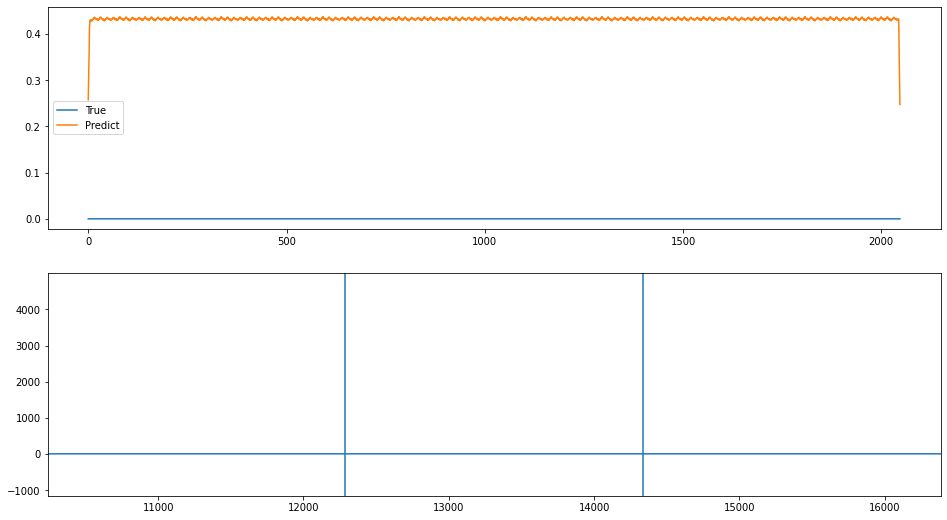

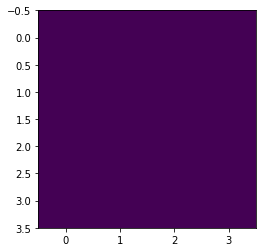

index: 67126
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7252
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-03 02:02:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7252/...
n_bunches                                                     108
bunch_index                                                    76
bunch_number                                                   27
ts_length                                                   65536
chunk                                                          12
Name: 3234, dtype: object


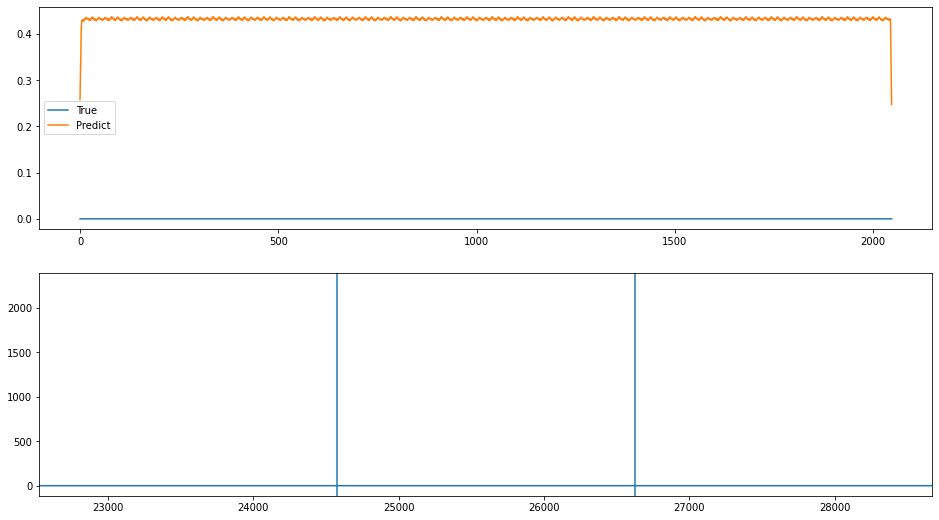

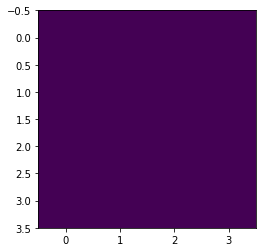

index: 193178
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6394
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 17:29:07
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6394/...
n_bunches                                                     140
bunch_index                                                   178
bunch_number                                                   58
ts_length                                                   65536
chunk                                                           1
Name: 446, dtype: object


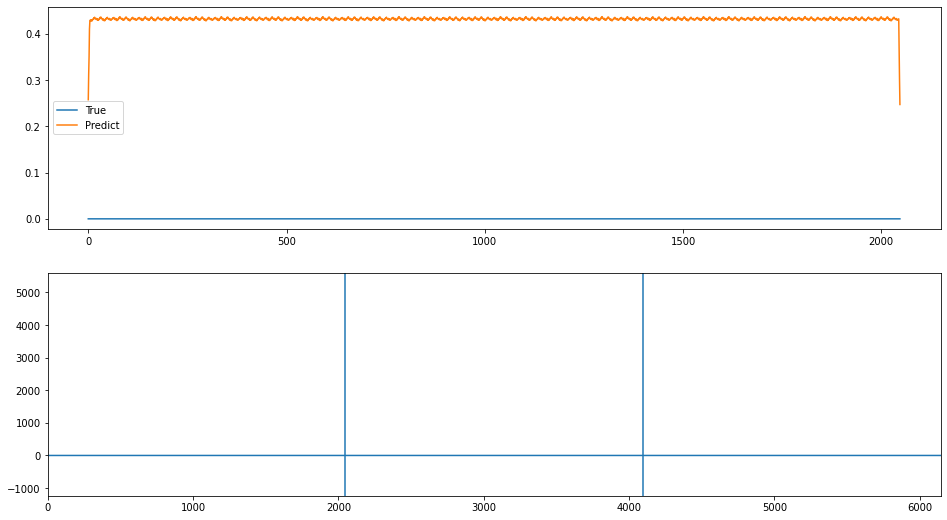

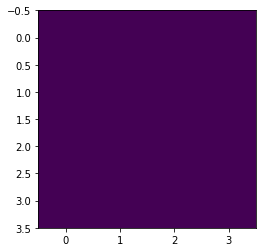

index: 7904
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6922
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-14 18:33:47
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6922/...
n_bunches                                                     108
bunch_index                                                    95
bunch_number                                                   46
ts_length                                                   65536
chunk                                                          12
Name: 3277, dtype: object


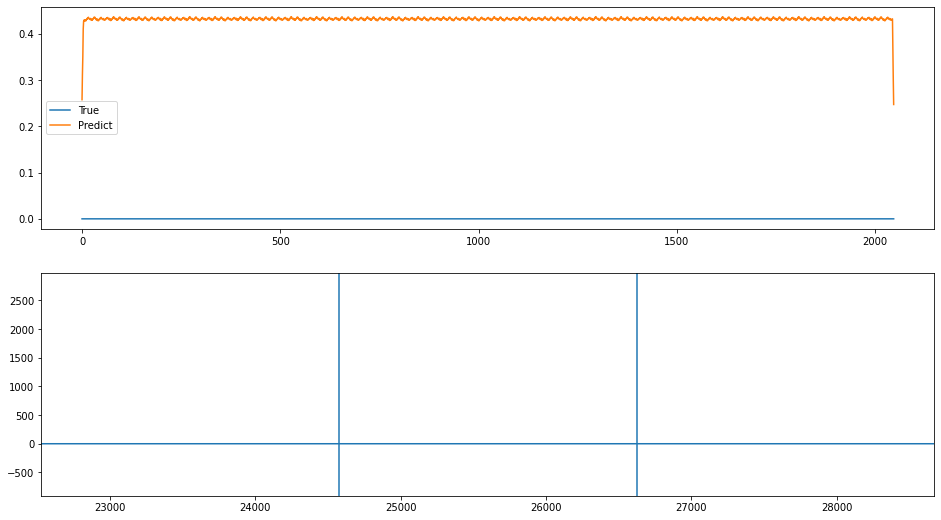

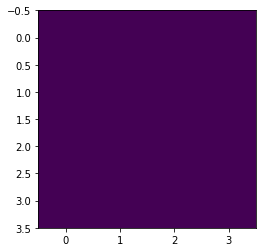

index: 95299
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 08:01:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7346/...
n_bunches                                                     780
bunch_index                                                  1056
bunch_number                                                  778
ts_length                                                   65536
chunk                                                          12
Name: 3124, dtype: object


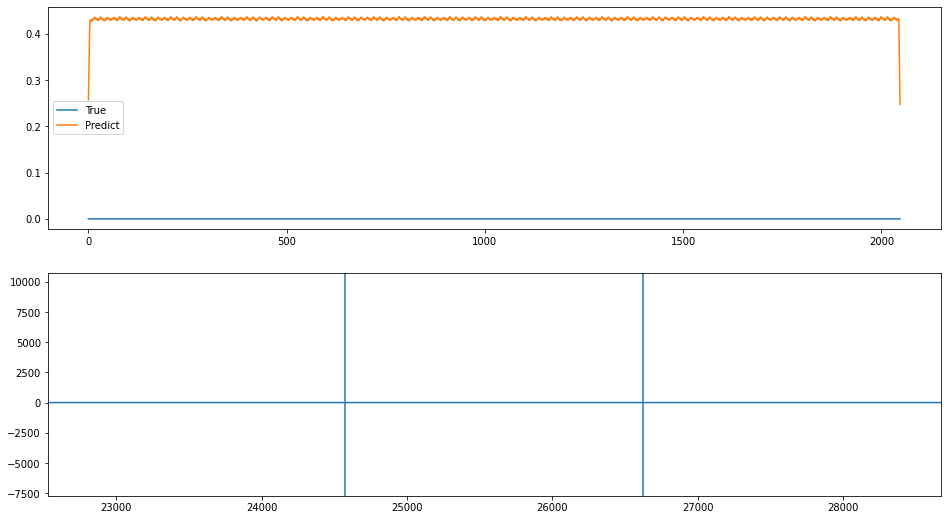

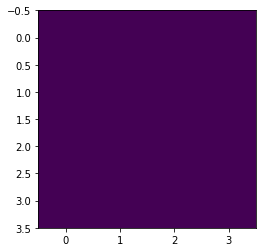

index: 352577
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7347
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-25 10:18:28
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7347/...
n_bunches                                                     540
bunch_index                                                   628
bunch_number                                                  444
ts_length                                                   65536
chunk                                                           4
Name: 1156, dtype: object


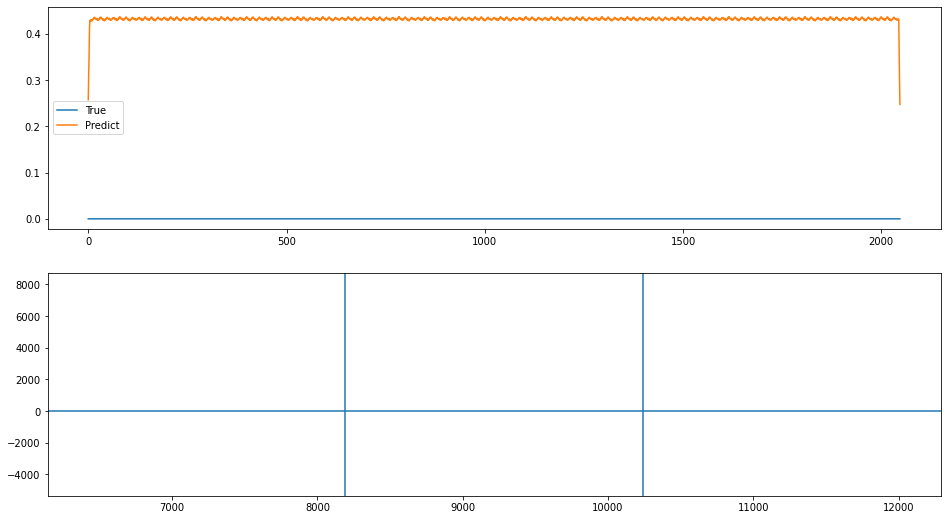

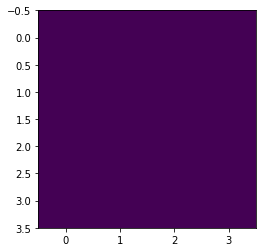

index: 247929
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7077
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-23 13:35:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7077/...
n_bunches                                                     300
bunch_index                                                  1044
bunch_number                                                  237
ts_length                                                   65536
chunk                                                          24
Name: 6276, dtype: object


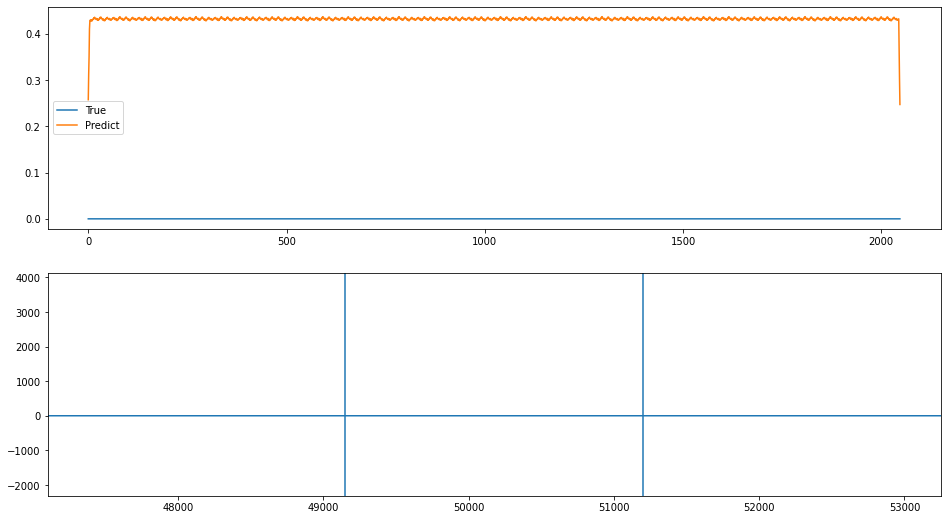

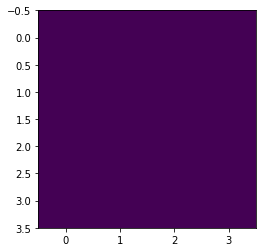

index: 309133
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  1198
bunch_number                                                  240
ts_length                                                   65536
chunk                                                          27
Name: 7133, dtype: object


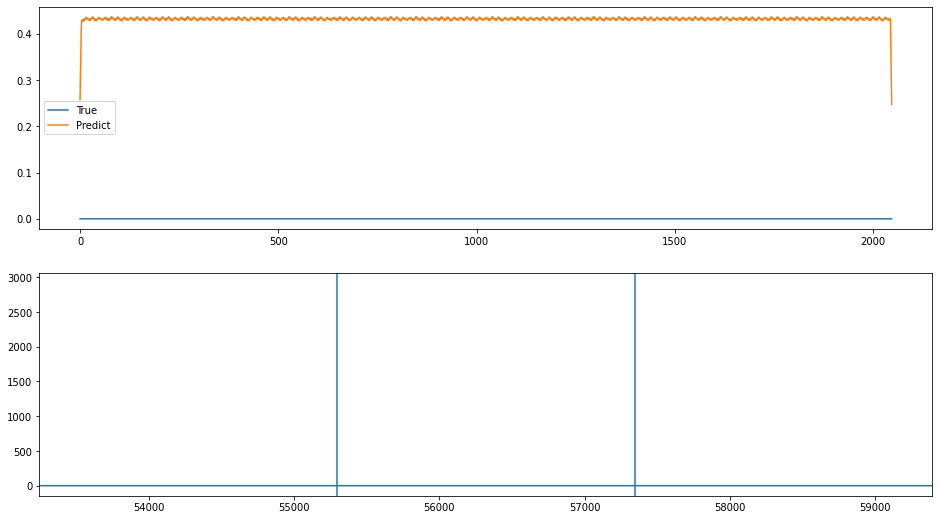

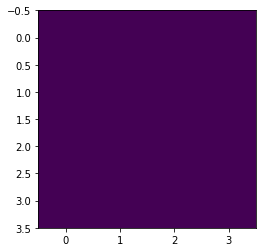

index: 47901
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6671
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-11 16:02:43
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6671/...
n_bunches                                                     156
bunch_index                                                   249
bunch_number                                                   47
ts_length                                                   65536
chunk                                                          12
Name: 3180, dtype: object


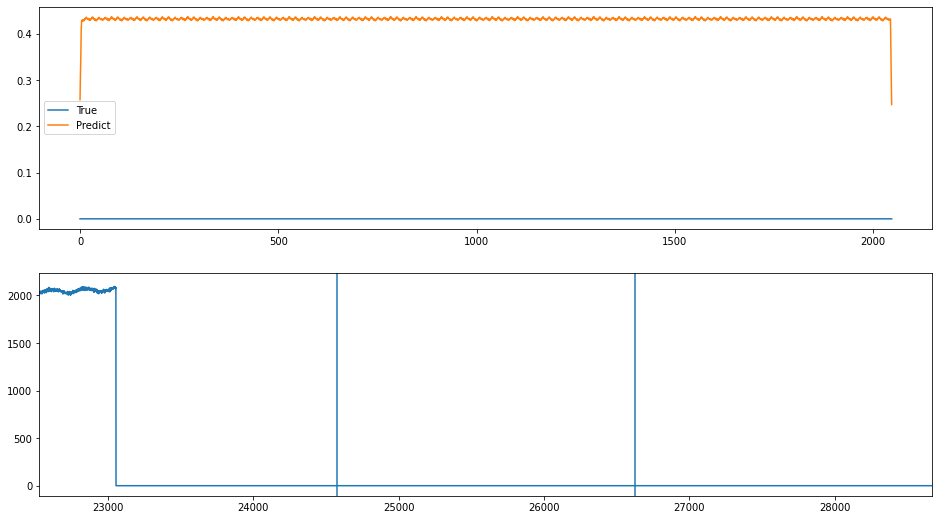

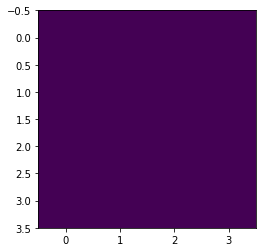

index: 200280
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6684
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 06:23:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6684/...
n_bunches                                                    1068
bunch_index                                                  1304
bunch_number                                                  931
ts_length                                                   65536
chunk                                                          14
Name: 3708, dtype: object


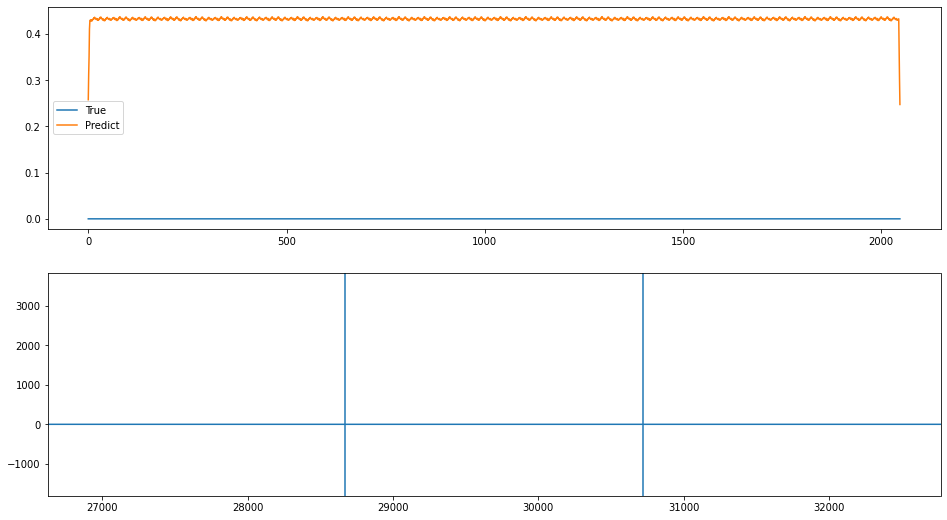

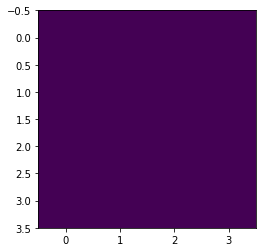

index: 235473
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6360
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-03 13:13:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6360/...
n_bunches                                                     652
bunch_index                                                  1147
bunch_number                                                  619
ts_length                                                   65536
chunk                                                           0
Name: 23, dtype: object


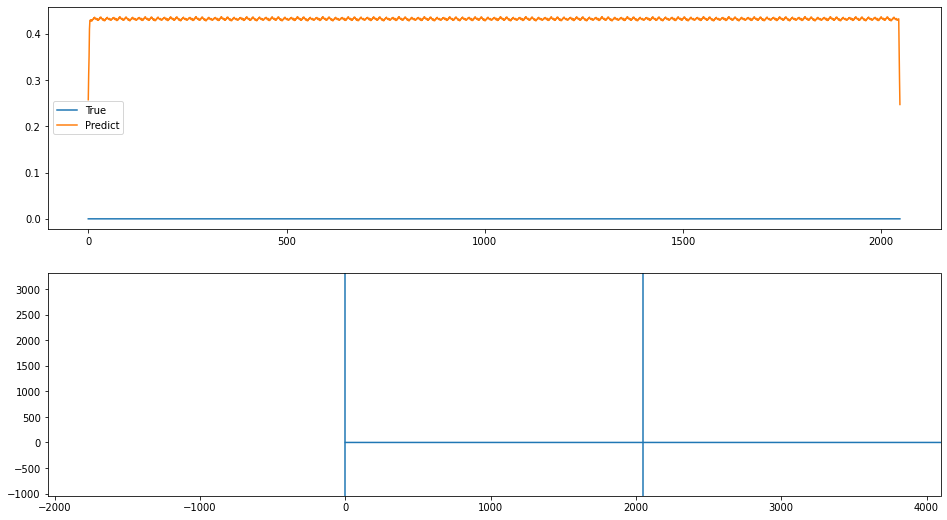

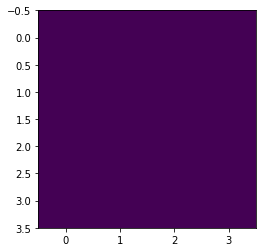

index: 43905
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6360
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-03 13:13:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6360/...
n_bunches                                                     652
bunch_index                                                  1146
bunch_number                                                  618
ts_length                                                   65536
chunk                                                           5
Name: 1372, dtype: object


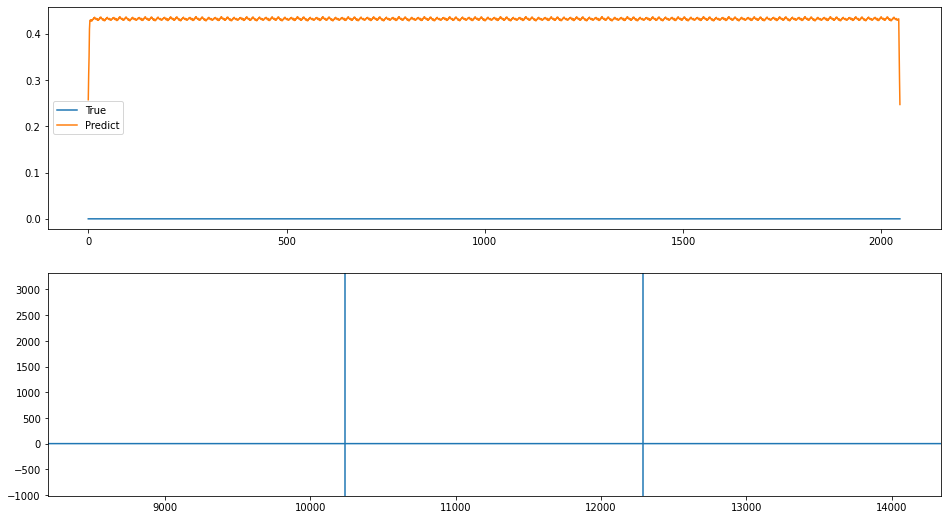

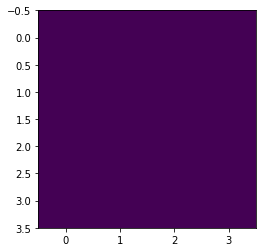

index: 252448
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7077
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-23 13:35:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7077/...
n_bunches                                                     300
bunch_index                                                  1044
bunch_number                                                  237
ts_length                                                   65536
chunk                                                           7
Name: 1924, dtype: object


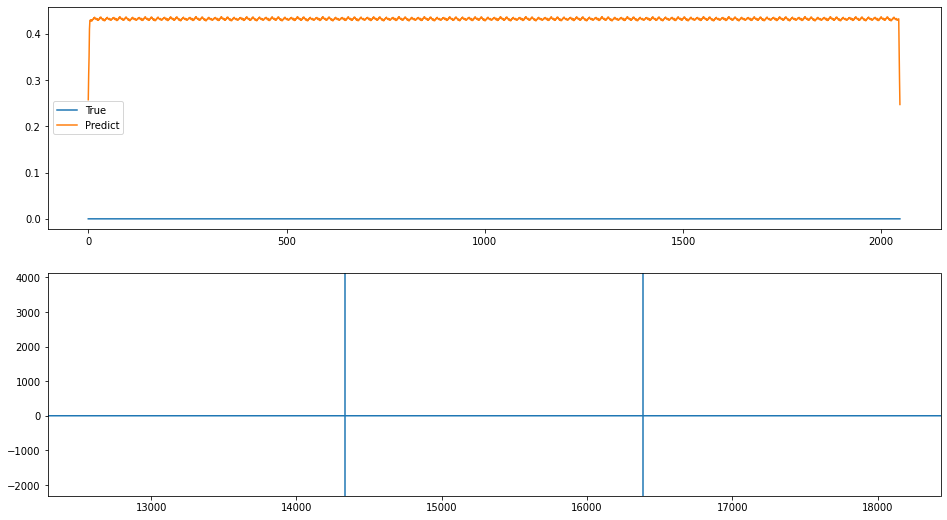

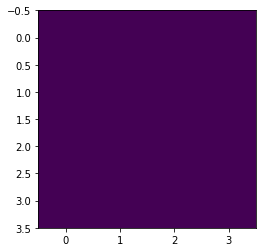

index: 120200
Error: 0.18660603450879049
type                                                         Inst
fill                                                         7314
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-17 23:05:11
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7314/...
n_bunches                                                     108
bunch_index                                                   394
bunch_number                                                   20
ts_length                                                   65536
chunk                                                          14
Name: 3759, dtype: object


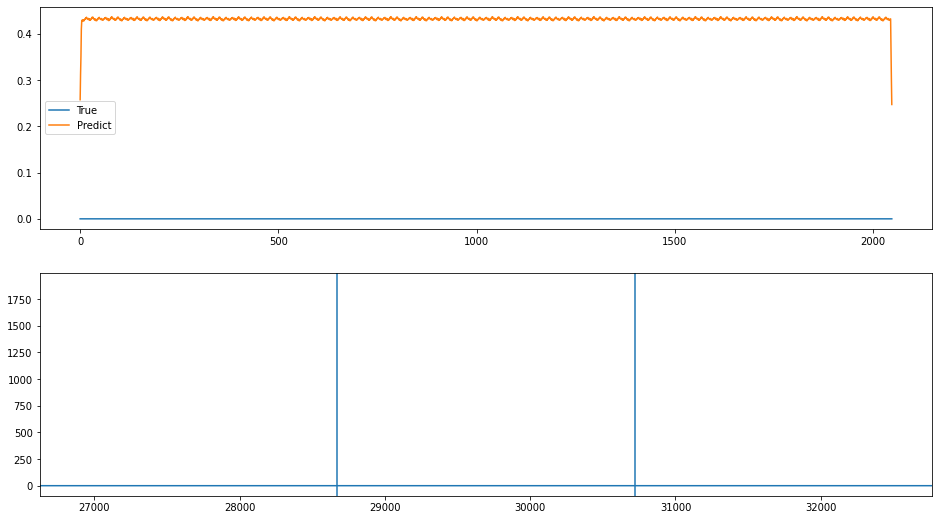

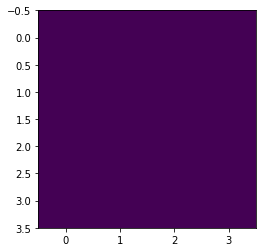

index: 309165
Error: 0.18660603450879049
type                                                         Inst
fill                                                         6880
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-03 02:40:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6880/...
n_bunches                                                     734
bunch_index                                                  1198
bunch_number                                                  240
ts_length                                                   65536
chunk                                                          26
Name: 6877, dtype: object


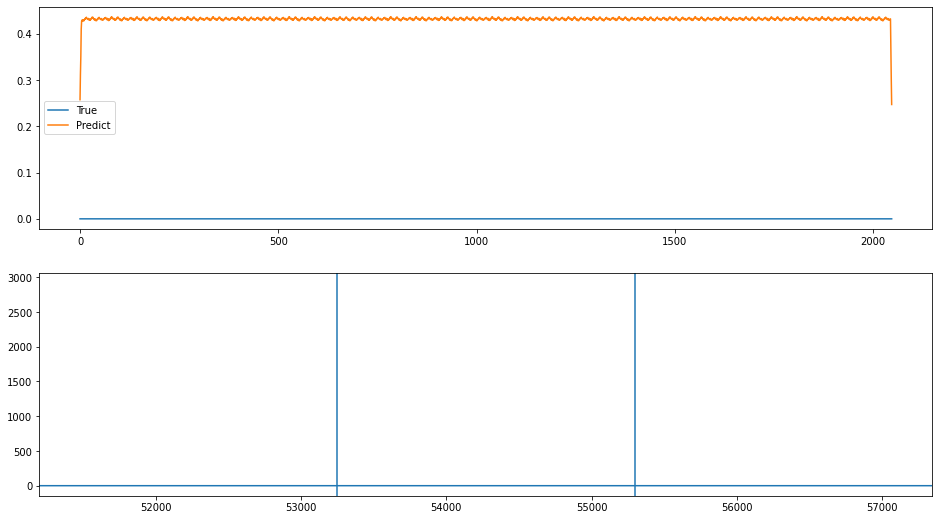

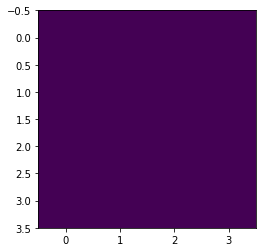

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 391751
Error: 0.03760589090749846
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-06 03:18:26
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                   248
bunch_number                                                  126
ts_length                                                   65536
chunk                                                          10
Name: 2672, dtype: object


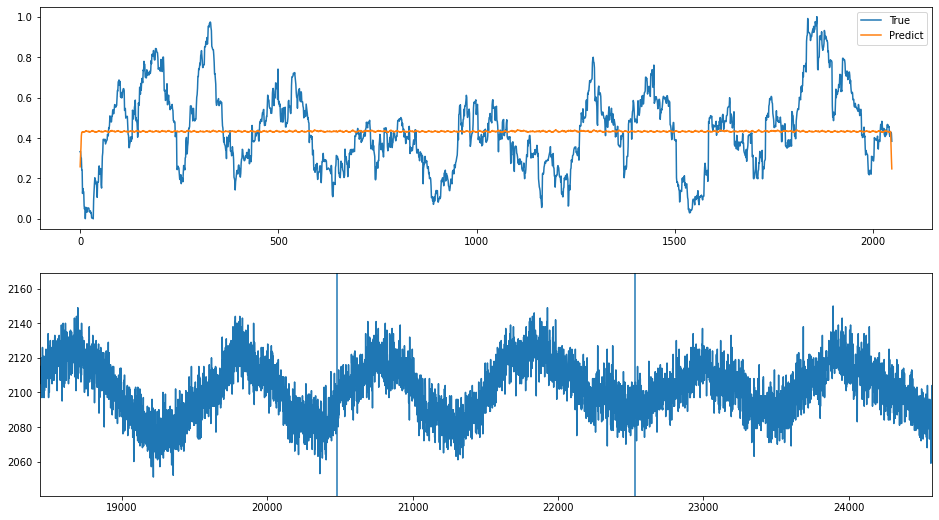

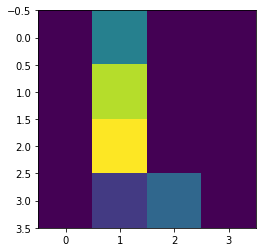

index: 148839
Error: 0.037605838580483136
type                                                         Inst
fill                                                         6749
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-01 03:49:35
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6749/...
n_bunches                                                     396
bunch_index                                                   306
bunch_number                                                  193
ts_length                                                   65536
chunk                                                          17
Name: 4543, dtype: object


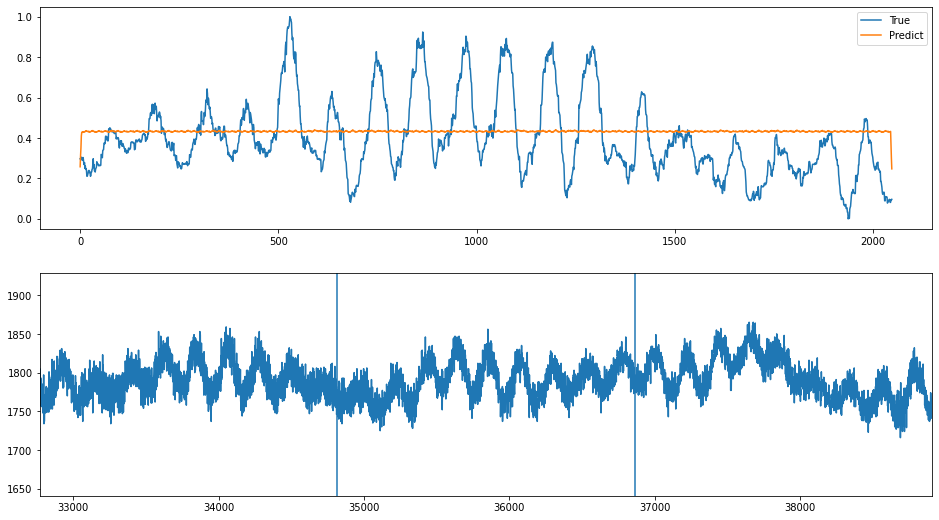

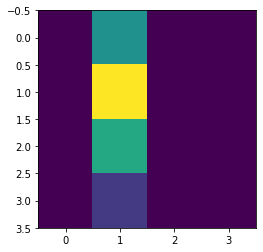

index: 78856
Error: 0.03760581750985628
type                                                         Inst
fill                                                         6271
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-04 11:54:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6271/...
n_bunches                                                    1836
bunch_index                                                  1253
bunch_number                                                  666
ts_length                                                   65536
chunk                                                          21
Name: 5561, dtype: object


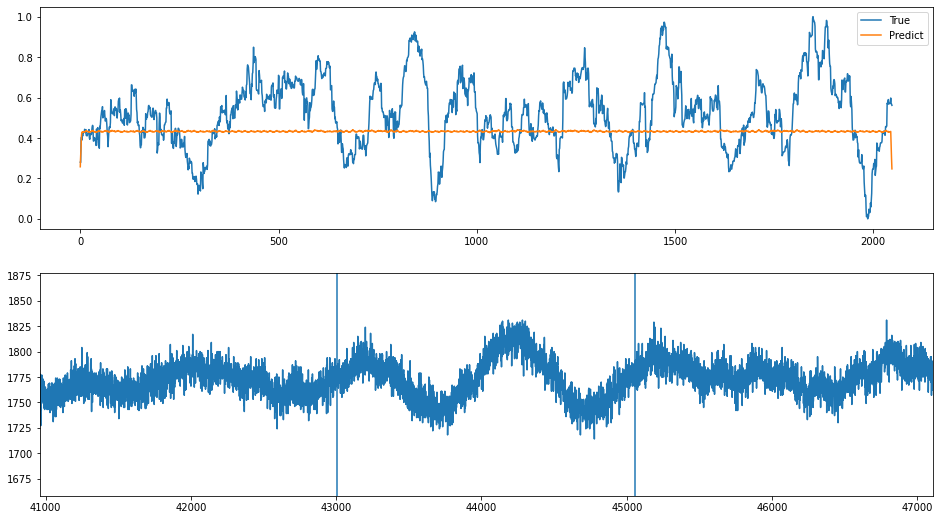

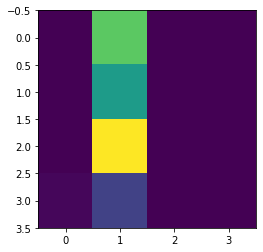

index: 324908
Error: 0.037605987993532
type                                                         Inst
fill                                                         6891
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-06 23:30:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6891/...
n_bunches                                                    1452
bunch_index                                                   584
bunch_number                                                  236
ts_length                                                   65536
chunk                                                          22
Name: 5697, dtype: object


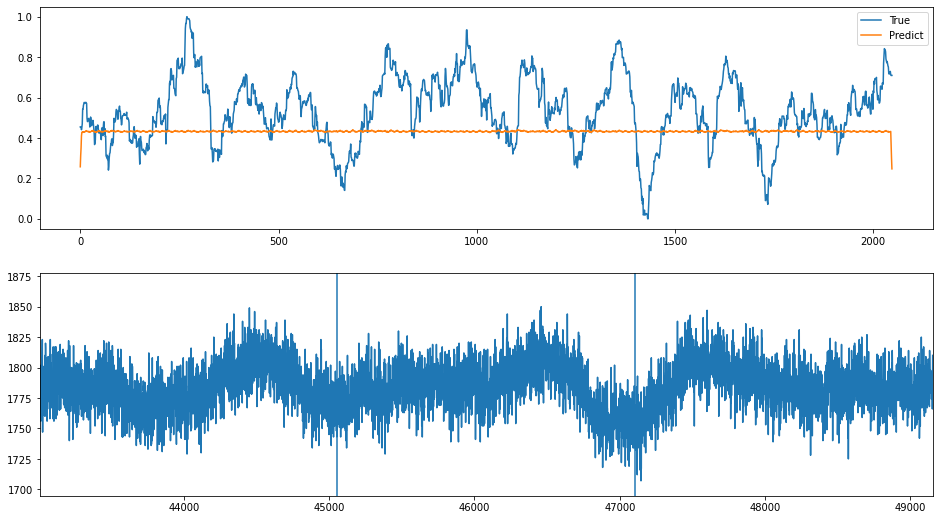

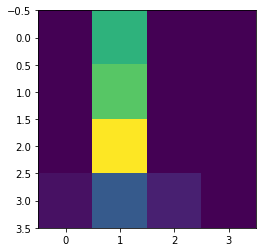

index: 62020
Error: 0.03760600104411964
type                                                         Inst
fill                                                         7033
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-07 10:07:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7033/...
n_bunches                                                    2556
bunch_index                                                  3388
bunch_number                                                 2531
ts_length                                                   65536
chunk                                                          11
Name: 2821, dtype: object


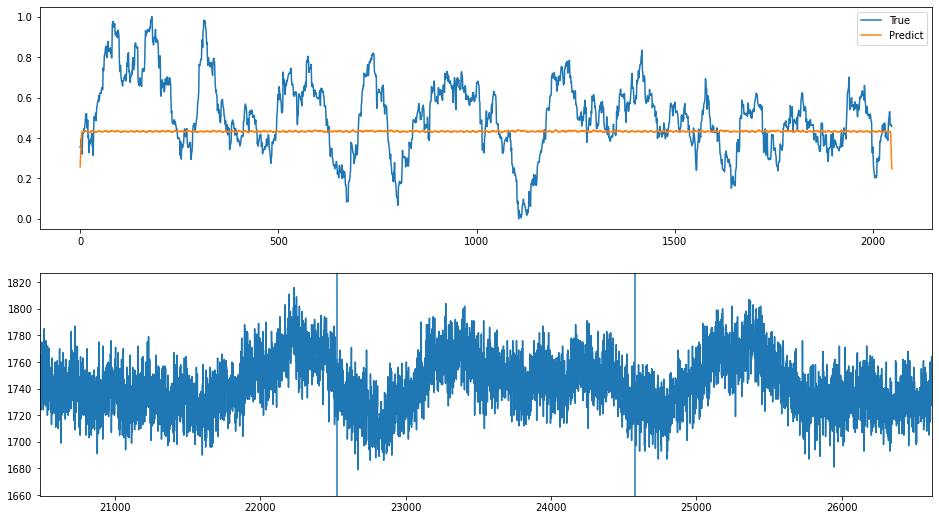

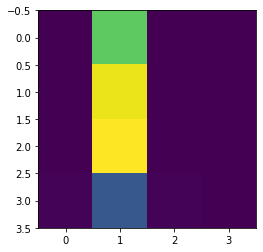

index: 306851
Error: 0.03760578761615886
type                                                         Inst
fill                                                         6957
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-21 22:27:55
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6957/...
n_bunches                                                     540
bunch_index                                                   163
bunch_number                                                  107
ts_length                                                   65536
chunk                                                          30
Name: 7845, dtype: object


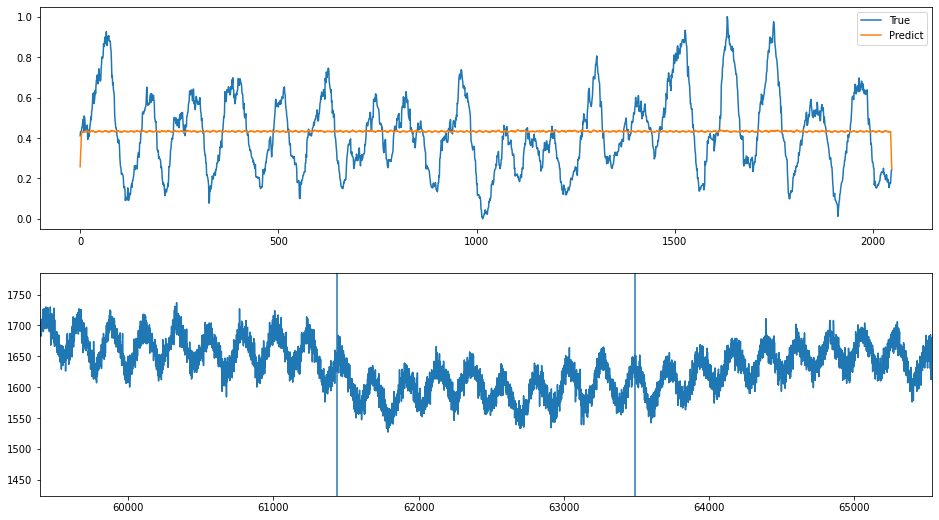

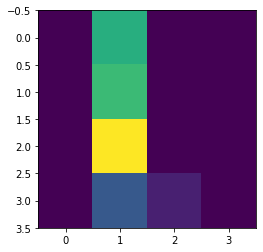

index: 310008
Error: 0.037605773451511504
type                                                         Inst
fill                                                         6364
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-06 23:32:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6364/...
n_bunches                                                    1868
bunch_index                                                  2614
bunch_number                                                 1389
ts_length                                                   65536
chunk                                                           1
Name: 458, dtype: object


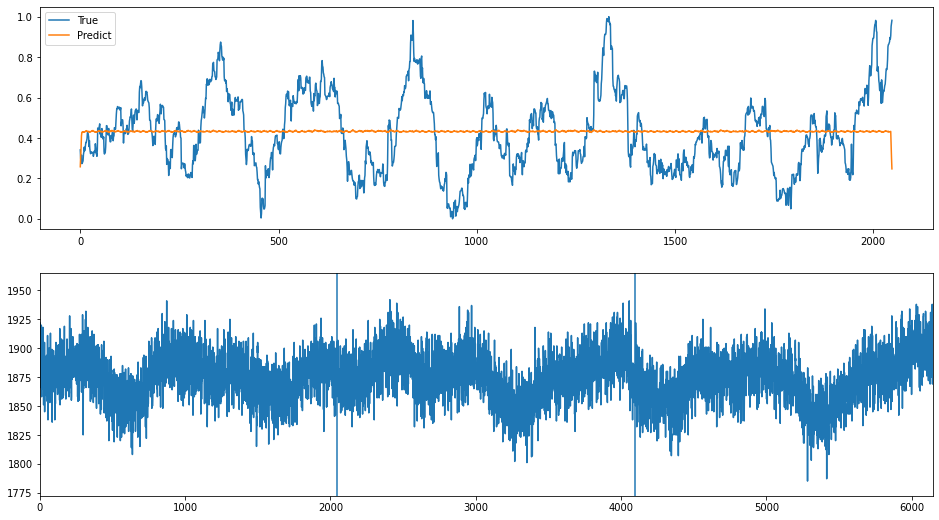

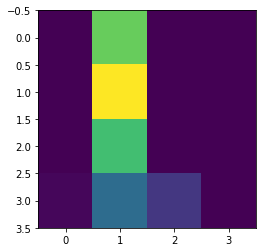

index: 159085
Error: 0.037605679114735335
type                                                         Inst
fill                                                         6921
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-14 15:01:42
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6921/...
n_bunches                                                     540
bunch_index                                                   350
bunch_number                                                  249
ts_length                                                   65536
chunk                                                          22
Name: 5885, dtype: object


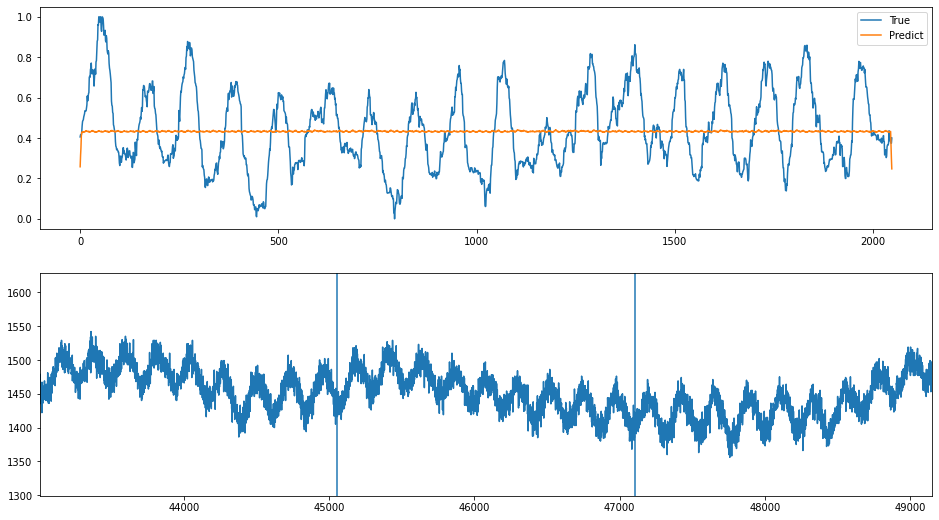

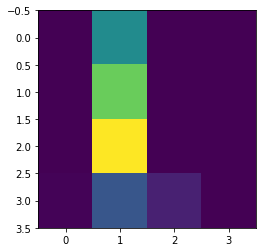

index: 17750
Error: 0.03760615374178459
type                                                         Inst
fill                                                         6706
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-20 11:13:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6706/...
n_bunches                                                     987
bunch_index                                                   546
bunch_number                                                  205
ts_length                                                   65536
chunk                                                          21
Name: 5500, dtype: object


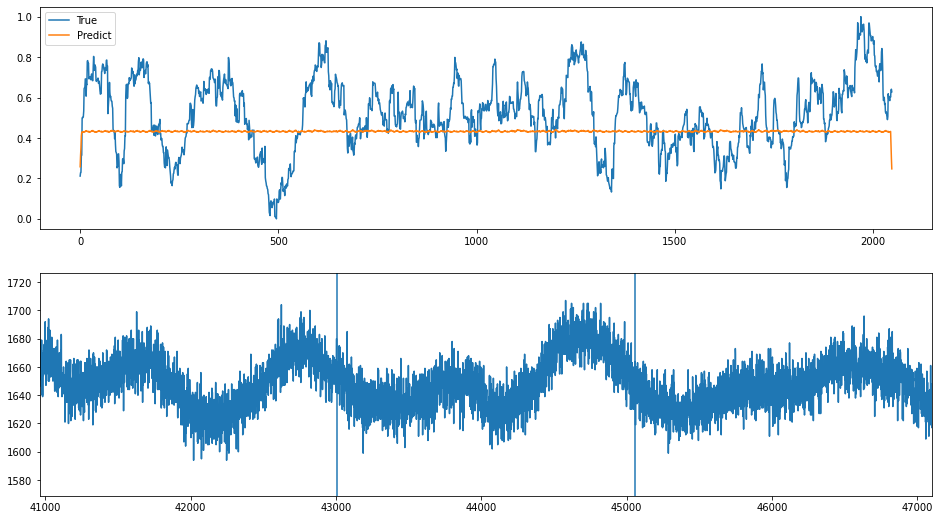

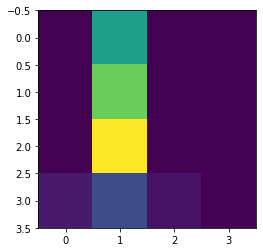

index: 54838
Error: 0.03760559798147681
type                                                         Inst
fill                                                         7384
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-10-29 02:48:09
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7384/...
n_bunches                                                     540
bunch_index                                                   394
bunch_number                                                  262
ts_length                                                   65536
chunk                                                          20
Name: 5346, dtype: object


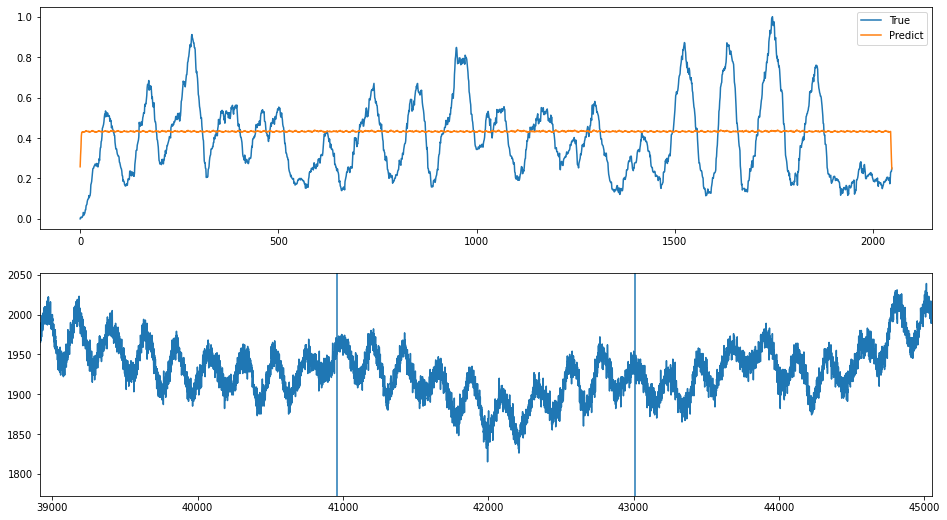

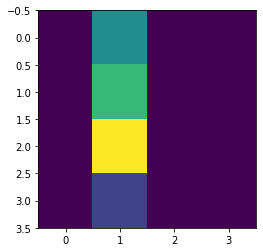

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
try:
    encoded = checker.encode(encoding_true)
except:
    encoded = np.array(checker.encoder(encoding_true)).squeeze()
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 16)

In [34]:
print(encoded_2d[0])

[0.         0.0628482  0.         0.         0.         0.1698794
 0.         0.         0.         0.27534166 0.         0.
 0.00378693 0.07798851 0.04354621 0.        ]


In [35]:
encoded_2d.min()

0.0

In [36]:
encoded_2d.max()

0.27534166

In [37]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

def plot_avg_encoding(cluster_indices):
    plt.imshow(encoded[cluster_indices].mean(axis=0))

In [38]:
import sklearn
from sklearn.manifold import TSNE

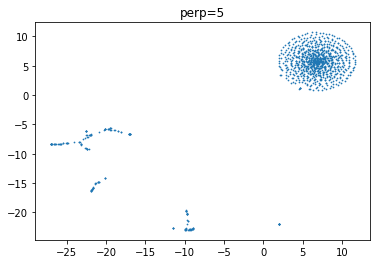

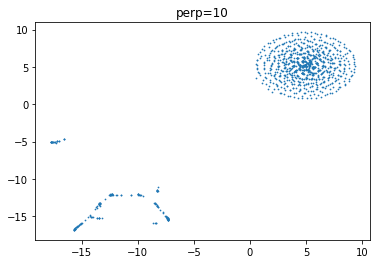

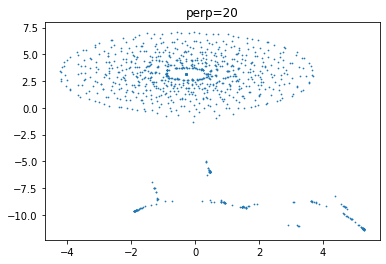

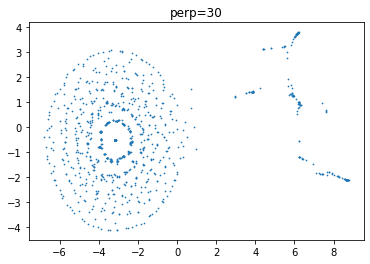

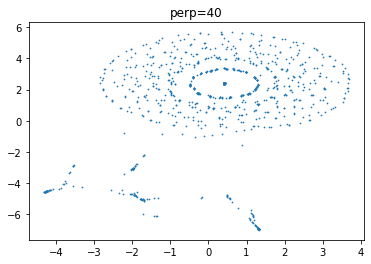

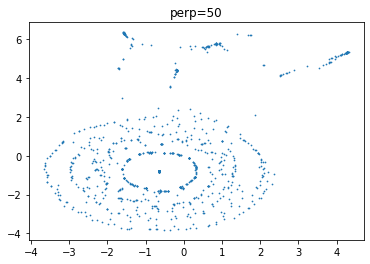

In [39]:
for perplexity in [5, 10, 20, 30, 40, 50]: 
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [40]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

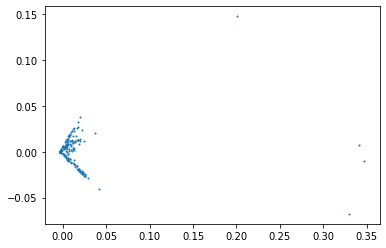

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
encoded_2d_pca = pca.fit_transform(encoded_2d)
plt.scatter(encoded_2d_pca[:, 0], encoded_2d_pca[:, 1], marker='.', s=4)

In [42]:
pca.explained_variance_ratio_.sum()

0.9972646

In [43]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

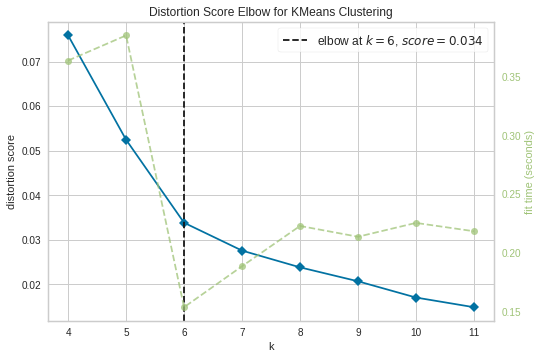

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
kmeans = KMeans()
viz = KElbowVisualizer(kmeans, k=(4, 12))
viz.fit(encoded_2d_pca)
viz.show()

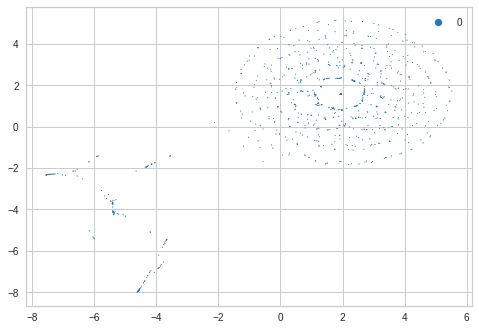

cluster 0
N samples: 1024


IndexError: index 1 is out of bounds for axis 2 with size 1

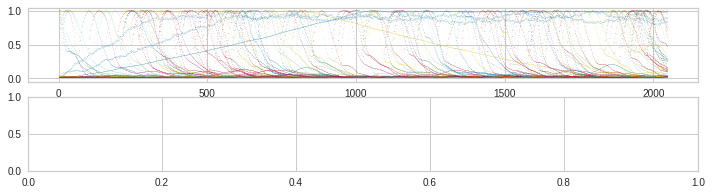

In [45]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4)
clustering = dbscan.fit(encoded_2d_tsne)
sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
plt.legend(*sc.legend_elements())
plt.show()
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()
    plot_avg_encoding(cluster_indices)
    plt.show()